# Importing all the necessary packages

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [45]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten

In [46]:
import csv
import os
import sklearn
import numpy as np
import ast
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
data_df = pd.read_csv("210619monatszahlenjuni2021monatszahlen2106verkehrsunfaelle.csv")

In [650]:
"""
MONATSZAHL -> Category

AUSPRAEGUNG -> Accident Type (insgesamt means total for all subcategories)

JAHR -> Year

MONAT -> Month

WERT -> Value

"""

'\nMONATSZAHL -> Category\n\nAUSPRAEGUNG -> Accident Type (insgesamt means total for all subcategories)\n\nJAHR -> Year\n\nMONAT -> Month\n\nWERT -> Value\n\n'

In [71]:
data_df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2021,202101,NaN,28.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN,40.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN,27.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN,26.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN,40.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1990,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
1991,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
1992,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
1993,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [72]:
"""
Step-1 : Eliminate the null values from the VALUE Column.

Step-2 : [Eliminate the "Summe" which means ("total" number of accidents for a particular accident type and category values)
from the Month Column.]

Step-3 : Eliminate the "202101" to "01" ["202009" to "09"] Only from the Month Column.

Step-4 : Mapped Category Types To Integer Values -> 0, 1, 2

Step-5 : Mapped Accident Types To Integer Values -> 0, 1, 2
"""

'\nStep-1 : Eliminate the null values from the VALUE Column.\n\nStep-2 : [Eliminate the "Summe" which means ("total" number of accidents for a particular accident type and category values)\nfrom the Month Column.]\n\nStep-3 : Eliminate the "202101" to "01" Only from the Month Column.\n\nStep-4 : Mapped Category Types To Integer Values -> 0, 1, 2\n\nStep-5 : Mapped Accident Types To Integer Values -> 0, 1, 2\n'

In [73]:
# CSV after Cleaning Performed From Step-1 and Step-2
data_df_2 = pd.read_csv("dataset-after-some-cleaning.csv")

In [74]:
data_df_2

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2020,202001,28,22.0,-20.00,27.27,37
1,Alkoholunfälle,insgesamt,2020,202002,40,28.0,42.86,42.86,38
2,Alkoholunfälle,insgesamt,2020,202003,27,34.0,-32.50,-20.59,37
3,Alkoholunfälle,insgesamt,2020,202004,26,36.0,-3.70,-27.78,36
4,Alkoholunfälle,insgesamt,2020,202005,40,39.0,53.85,2.56,36
...,...,...,...,...,...,...,...,...,...
1759,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647,NaN,-13.04,NaN,584
1760,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675,NaN,4.33,NaN,594
1761,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615,NaN,-8.89,NaN,596
1762,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578,NaN,-6.02,NaN,594


In [651]:
# After Cleaning From Step-3, Step-4 and Step-5
"""
Category Types :
Alkoholunf√§lle -> 0
Fluchtunf√§lle -> 1
Verkehrsunf√§lle -> 2

Accident Types :
insgesamt -> 0
mit Personensch√§den -> 1
Verletzte und Get√∂tete -> 2
"""

'\nCategory Types :\nAlkoholunf√§lle -> 0\nFluchtunf√§lle -> 1\nVerkehrsunf√§lle -> 2\n\nAccident Types :\ninsgesamt -> 0\nmit Personensch√§den -> 1\nVerletzte und Get√∂tete -> 2\n'

In [362]:
data_df_9 = pd.read_csv("dataset-after-final-cleaning.csv")

In [363]:
data_df_9

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,0,0,2020,1,28,22,-20.00,27.27,37
1,0,0,2020,2,40,28,42.86,42.86,38
2,0,0,2020,3,27,34,-32.50,-20.59,37
3,0,0,2020,4,26,36,-3.70,-27.78,36
4,0,0,2020,5,40,39,53.85,2.56,36
...,...,...,...,...,...,...,...,...,...
1673,2,2,2001,8,600,647,-34.85,-7.26,617
1674,2,2,2001,9,643,675,7.17,-4.74,614
1675,2,2,2001,10,717,615,11.51,16.59,623
1676,2,2,2001,11,568,578,-20.78,-1.73,622


In [365]:
# Final Pipeline
X_df = data_df_9[['MONATSZAHL','AUSPRAEGUNG','JAHR','MONAT']].values
y_df = data_df_9[['WERT']].values

In [366]:
X_df

array([[   0,    0, 2020,    1],
       [   0,    0, 2020,    2],
       [   0,    0, 2020,    3],
       ...,
       [   2,    2, 2001,   10],
       [   2,    2, 2001,   11],
       [   2,    2, 2001,   12]])

In [367]:
y_df

array([[ 28],
       [ 40],
       [ 27],
       ...,
       [717],
       [568],
       [507]])

In [368]:
X_train_df, X_valid_df, y_train_df, y_valid_df = train_test_split(X_df, y_df, test_size=0.1, random_state=0)

In [369]:
print(len(X_train_df))
print(len(y_train_df))
print(len(X_valid_df))
print(len(X_valid_df))

1510
1510
168
168


In [370]:
input_dim_df = X_train_df.shape[1]
print(input_dim_df)

4


### Trying Bernoulli Naive Bayes

In [372]:
bnb = BernoulliNB()
bnb.fit(X_train_df, y_train_df)

/Users/prateeksawhney97/opt/anaconda3/envs/accidentdps/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BernoulliNB()

In [373]:
my_prediction_bnb_df = bnb.predict([[0,0,2020,1]]) # Testing On The First Row -> Result Should be = 28 

In [374]:
print(my_prediction_bnb_df)

[40]


### Trying Linear Regression

In [375]:
from sklearn.linear_model import LinearRegression

In [376]:
regressor_df = LinearRegression()

In [377]:
regressor_df.fit(X_train_df, y_train_df)

LinearRegression()

In [378]:
regressor_df.predict([[0,0,2020,1]]) # Testing On The First Row -> Result Should be = 28 

array([[563.65024016]])

### Trying Own Model -> The Best it can be.

In [495]:
model_df = Sequential()
model_df.add(Dense(4, activation='relu', input_dim=input_dim_df))
model_df.add(Dense(8, activation='relu'))
model_df.add(Dense(16, activation='relu'))
model_df.add(Dense(32, activation='relu'))
model_df.add(Dense(64, activation='relu'))
model_df.add(Dense(128, activation='relu'))
model_df.add(Dense(256, activation='relu'))
model_df.add(Dense(512, activation='relu'))
model_df.add(Dense(1024, activation='relu'))
model_df.add(Dense(512, activation='relu'))
model_df.add(Dense(256, activation='relu'))
model_df.add(Dense(128, activation='relu'))
model_df.add(Dense(64, activation='relu'))
model_df.add(Dense(32, activation='relu'))
model_df.add(Dense(16, activation='relu'))
model_df.add(Dense(8, activation='relu'))
model_df.add(Dense(4, activation='relu'))
model_df.add(Dense(1))

In [496]:
model_df.compile(loss='mean_squared_error', optimizer=Adam(lr=1.0e-5))

In [497]:
history_df = model_df.fit(X_train_df, y_train_df, nb_epoch=10000, verbose=1, validation_data=(X_valid_df, y_valid_df))

Train on 1510 samples, validate on 168 samples
Epoch 1/10000
1510/1510 [==============================] - 6s - loss: 2034990.3362 - val_loss: 1627905.3726
Epoch 2/10000
1510/1510 [==============================] - 0s - loss: 2033631.0823 - val_loss: 1626172.9408
Epoch 3/10000
1510/1510 [==============================] - 0s - loss: 2030428.1861 - val_loss: 1621764.4152
Epoch 4/10000
1510/1510 [==============================] - 0s - loss: 2022012.9735 - val_loss: 1610178.3181
Epoch 5/10000
1510/1510 [==============================] - 0s - loss: 2000029.0387 - val_loss: 1580029.8097
Epoch 6/10000
1510/1510 [==============================] - 0s - loss: 1944884.4485 - val_loss: 1505143.8899
Epoch 7/10000
1510/1510 [==============================] - 0s - loss: 1816993.5646 - val_loss: 1353919.0033
Epoch 8/10000
1510/1510 [==============================] - 0s - loss: 1603082.0361 - val_loss: 1185386.3624
Epoch 9/10000
1510/1510 [==============================] - 0s - loss: 1445285.6199 - val_

1510/1510 [==============================] - 0s - loss: 1419143.8411 - val_loss: 1167591.8036
Epoch 76/10000
1510/1510 [==============================] - 0s - loss: 1419765.6838 - val_loss: 1169180.4315
Epoch 77/10000
1510/1510 [==============================] - 0s - loss: 1419433.2460 - val_loss: 1166861.8943
Epoch 78/10000
1510/1510 [==============================] - 0s - loss: 1418895.1212 - val_loss: 1171412.1473
Epoch 79/10000
1510/1510 [==============================] - 0s - loss: 1419667.5536 - val_loss: 1169261.2470
Epoch 80/10000
1510/1510 [==============================] - 0s - loss: 1418992.7206 - val_loss: 1168249.5952
Epoch 81/10000
1510/1510 [==============================] - 0s - loss: 1419468.5124 - val_loss: 1170115.3095
Epoch 82/10000
1510/1510 [==============================] - 0s - loss: 1419119.3990 - val_loss: 1167286.5759
Epoch 83/10000
1510/1510 [==============================] - 0s - loss: 1419495.2811 - val_loss: 1169903.1637
Epoch 84/10000
1510/1510 [========

1510/1510 [==============================] - 0s - loss: 1419165.5855 - val_loss: 1170586.3125
Epoch 150/10000
1510/1510 [==============================] - 0s - loss: 1418655.3763 - val_loss: 1166692.8065
Epoch 151/10000
1510/1510 [==============================] - 0s - loss: 1418579.0414 - val_loss: 1167790.8051
Epoch 152/10000
1510/1510 [==============================] - 0s - loss: 1419624.2321 - val_loss: 1166931.3750
Epoch 153/10000
1510/1510 [==============================] - 0s - loss: 1418847.0781 - val_loss: 1168668.3080
Epoch 154/10000
1510/1510 [==============================] - 0s - loss: 1418302.8744 - val_loss: 1167848.7812
Epoch 155/10000
1510/1510 [==============================] - 0s - loss: 1418520.4325 - val_loss: 1167092.869010825.04
Epoch 156/10000
1510/1510 [==============================] - 0s - loss: 1418427.1366 - val_loss: 1169016.3006
Epoch 157/10000
1510/1510 [==============================] - 0s - loss: 1418193.2720 - val_loss: 1167756.2560
Epoch 158/10000
15

1510/1510 [==============================] - 0s - loss: 1418545.8960 - val_loss: 1166100.6845
Epoch 224/10000
1510/1510 [==============================] - 0s - loss: 1417780.8013 - val_loss: 1167187.2619
Epoch 225/10000
1510/1510 [==============================] - 0s - loss: 1418113.1147 - val_loss: 1166973.8318
Epoch 226/10000
1510/1510 [==============================] - 0s - loss: 1417586.4280 - val_loss: 1169046.8110
Epoch 227/10000
1510/1510 [==============================] - 0s - loss: 1417998.2155 - val_loss: 1169594.5327
Epoch 228/10000
1510/1510 [==============================] - 0s - loss: 1417625.4130 - val_loss: 1169321.0982
Epoch 229/10000
1510/1510 [==============================] - 0s - loss: 1418132.0685 - val_loss: 1168377.1548
Epoch 230/10000
1510/1510 [==============================] - 0s - loss: 1419130.7369 - val_loss: 1170520.8899
Epoch 231/10000
1510/1510 [==============================] - 0s - loss: 1417556.4920 - val_loss: 1166236.8423
Epoch 232/10000
1510/1510 

1510/1510 [==============================] - 0s - loss: 1417933.3043 - val_loss: 1167694.3482
Epoch 298/10000
1510/1510 [==============================] - 0s - loss: 1417393.6477 - val_loss: 1164723.4256
Epoch 299/10000
1510/1510 [==============================] - 0s - loss: 1417316.6268 - val_loss: 1167413.9494
Epoch 300/10000
1510/1510 [==============================] - 0s - loss: 1416944.4450 - val_loss: 1168702.5461
Epoch 301/10000
1510/1510 [==============================] - 0s - loss: 1417190.9563 - val_loss: 1166118.6339
Epoch 302/10000
1510/1510 [==============================] - 0s - loss: 1417235.2509 - val_loss: 1170438.2277
Epoch 303/10000
1510/1510 [==============================] - 0s - loss: 1417296.9520 - val_loss: 1168815.1027
Epoch 304/10000
1510/1510 [==============================] - 0s - loss: 1417873.1831 - val_loss: 1165368.2842
Epoch 305/10000
1510/1510 [==============================] - 0s - loss: 1417102.0439 - val_loss: 1168139.6176
Epoch 306/10000
1510/1510 

1510/1510 [==============================] - 0s - loss: 1417328.8332 - val_loss: 1166511.1131
Epoch 372/10000
1510/1510 [==============================] - 0s - loss: 1417469.7348 - val_loss: 1167110.4033
Epoch 373/10000
1510/1510 [==============================] - 0s - loss: 1417761.1954 - val_loss: 1166469.9613
Epoch 374/10000
1510/1510 [==============================] - 0s - loss: 1416448.0425 - val_loss: 1169814.8720
Epoch 375/10000
1510/1510 [==============================] - 0s - loss: 1417386.8180 - val_loss: 1165884.5908
Epoch 376/10000
1510/1510 [==============================] - 0s - loss: 1416591.7783 - val_loss: 1166277.7277
Epoch 377/10000
1510/1510 [==============================] - 0s - loss: 1417322.8613 - val_loss: 1166896.4494
Epoch 378/10000
1510/1510 [==============================] - 0s - loss: 1416392.7182 - val_loss: 1167472.2351
Epoch 379/10000
1510/1510 [==============================] - 0s - loss: 1416935.4291 - val_loss: 1167672.8497
Epoch 380/10000
1510/1510 

1510/1510 [==============================] - 0s - loss: 1416872.3558 - val_loss: 1171666.0833
Epoch 446/10000
1510/1510 [==============================] - 0s - loss: 1416042.0758 - val_loss: 1165962.9077
Epoch 447/10000
1510/1510 [==============================] - 0s - loss: 1416117.4803 - val_loss: 1166789.4435
Epoch 448/10000
1510/1510 [==============================] - 0s - loss: 1415964.5753 - val_loss: 1167191.1190
Epoch 449/10000
1510/1510 [==============================] - 0s - loss: 1416026.9574 - val_loss: 1166310.1860
Epoch 450/10000
1510/1510 [==============================] - 0s - loss: 1415930.1934 - val_loss: 1166808.3958
Epoch 451/10000
1510/1510 [==============================] - 0s - loss: 1417090.2988 - val_loss: 1166285.7827
Epoch 452/10000
1510/1510 [==============================] - 0s - loss: 1416017.2089 - val_loss: 1168072.8036
Epoch 453/10000
1510/1510 [==============================] - 0s - loss: 1416088.7123 - val_loss: 1169370.7262
Epoch 454/10000
1510/1510 

1510/1510 [==============================] - 0s - loss: 1415457.7841 - val_loss: 1165117.0804
Epoch 520/10000
1510/1510 [==============================] - 0s - loss: 1415526.9186 - val_loss: 1167327.7679
Epoch 521/10000
1510/1510 [==============================] - 0s - loss: 1415327.8427 - val_loss: 1167490.9792
Epoch 522/10000
1510/1510 [==============================] - 0s - loss: 1416197.0553 - val_loss: 1167623.1949
Epoch 523/10000
1510/1510 [==============================] - 0s - loss: 1415541.3697 - val_loss: 1164609.1265
Epoch 524/10000
1510/1510 [==============================] - 0s - loss: 1415815.5502 - val_loss: 1168129.1786
Epoch 525/10000
1510/1510 [==============================] - 0s - loss: 1415948.4227 - val_loss: 1166665.0774
Epoch 526/10000
1510/1510 [==============================] - 0s - loss: 1415236.8530 - val_loss: 1166492.0744
Epoch 527/10000
1510/1510 [==============================] - 0s - loss: 1415494.6462 - val_loss: 1165529.7604
Epoch 528/10000
1510/1510 

1510/1510 [==============================] - 0s - loss: 1416139.3517 - val_loss: 1165972.3810
Epoch 594/10000
1510/1510 [==============================] - 0s - loss: 1414956.5285 - val_loss: 1166732.7649
Epoch 595/10000
1510/1510 [==============================] - 0s - loss: 1415249.3854 - val_loss: 1171091.5119
Epoch 596/10000
1510/1510 [==============================] - 0s - loss: 1415742.9409 - val_loss: 1165437.0685
Epoch 597/10000
1510/1510 [==============================] - 0s - loss: 1415066.4621 - val_loss: 1164576.6548
Epoch 598/10000
1510/1510 [==============================] - 0s - loss: 1415494.7103 - val_loss: 1167854.2351
Epoch 599/10000
1510/1510 [==============================] - 0s - loss: 1414448.2997 - val_loss: 1163405.5551
Epoch 600/10000
1510/1510 [==============================] - 0s - loss: 1415536.3545 - val_loss: 1163822.3765
Epoch 601/10000
1510/1510 [==============================] - 0s - loss: 1414893.6156 - val_loss: 1163564.6384
Epoch 602/10000
1510/1510 

1510/1510 [==============================] - 0s - loss: 1414269.0611 - val_loss: 1164399.6637
Epoch 668/10000
1510/1510 [==============================] - 0s - loss: 1415582.2298 - val_loss: 1162571.1935
Epoch 669/10000
1510/1510 [==============================] - 0s - loss: 1414820.0738 - val_loss: 1165706.3006
Epoch 670/10000
1510/1510 [==============================] - 0s - loss: 1414747.2854 - val_loss: 1166632.2679
Epoch 671/10000
1510/1510 [==============================] - 0s - loss: 1414017.2768 - val_loss: 1164394.0744
Epoch 672/10000
1510/1510 [==============================] - 0s - loss: 1414204.0462 - val_loss: 1165834.4911
Epoch 673/10000
1510/1510 [==============================] - 0s - loss: 1414418.2284 - val_loss: 1165548.5729
Epoch 674/10000
1510/1510 [==============================] - 0s - loss: 1414475.6268 - val_loss: 1164069.5476
Epoch 675/10000
1510/1510 [==============================] - 0s - loss: 1413920.3232 - val_loss: 1169170.1250
Epoch 676/10000
1510/1510 

1510/1510 [==============================] - 0s - loss: 1413795.0242 - val_loss: 1164215.4077
Epoch 742/10000
1510/1510 [==============================] - 0s - loss: 1413796.5714 - val_loss: 1165517.1562
Epoch 743/10000
1510/1510 [==============================] - 0s - loss: 1414012.4891 - val_loss: 1164844.6920
Epoch 744/10000
1510/1510 [==============================] - 0s - loss: 1413452.9286 - val_loss: 1166351.7188
Epoch 745/10000
1510/1510 [==============================] - 0s - loss: 1413625.8111 - val_loss: 1165816.8735
Epoch 746/10000
1510/1510 [==============================] - 0s - loss: 1414233.8644 - val_loss: 1165717.6429
Epoch 747/10000
1510/1510 [==============================] - 0s - loss: 1413756.9129 - val_loss: 1165333.7039
Epoch 748/10000
1510/1510 [==============================] - 0s - loss: 1413806.6904 - val_loss: 1165593.7440
Epoch 749/10000
1510/1510 [==============================] - 0s - loss: 1413721.2802 - val_loss: 1164090.3557
Epoch 750/10000
1510/1510 

1510/1510 [==============================] - 0s - loss: 1414546.0997 - val_loss: 1165209.8170
Epoch 816/10000
1510/1510 [==============================] - 0s - loss: 1413064.0368 - val_loss: 1163149.0893
Epoch 817/10000
1510/1510 [==============================] - 0s - loss: 1413065.3205 - val_loss: 1165143.5833
Epoch 818/10000
1510/1510 [==============================] - 0s - loss: 1413432.9354 - val_loss: 1165309.5357
Epoch 819/10000
1510/1510 [==============================] - 0s - loss: 1413269.1142 - val_loss: 1166562.0536
Epoch 820/10000
1510/1510 [==============================] - 0s - loss: 1413428.6477 - val_loss: 1164945.2173
Epoch 821/10000
1510/1510 [==============================] - 0s - loss: 1413560.2053 - val_loss: 1164905.3929
Epoch 822/10000
1510/1510 [==============================] - 0s - loss: 1413285.3719 - val_loss: 1162174.8899
Epoch 823/10000
1510/1510 [==============================] - 0s - loss: 1413433.6857 - val_loss: 1165689.7589
Epoch 824/10000
1510/1510 

1510/1510 [==============================] - 0s - loss: 1412566.6474 - val_loss: 1164671.6146
Epoch 890/10000
1510/1510 [==============================] - 0s - loss: 1414273.6327 - val_loss: 1167731.4271
Epoch 891/10000
1510/1510 [==============================] - 0s - loss: 1412677.7851 - val_loss: 1166735.5045
Epoch 892/10000
1510/1510 [==============================] - 0s - loss: 1413691.5206 - val_loss: 1164169.1667
Epoch 893/10000
1510/1510 [==============================] - 0s - loss: 1412295.6193 - val_loss: 1162030.8884
Epoch 894/10000
1510/1510 [==============================] - 0s - loss: 1413616.5087 - val_loss: 1163919.7054
Epoch 895/10000
1510/1510 [==============================] - 0s - loss: 1413552.8104 - val_loss: 1164783.4762
Epoch 896/10000
1510/1510 [==============================] - 0s - loss: 1412529.1789 - val_loss: 1163753.3214
Epoch 897/10000
1510/1510 [==============================] - 0s - loss: 1412901.8904 - val_loss: 1162589.9315
Epoch 898/10000
1510/1510 

1510/1510 [==============================] - 0s - loss: 1412552.1894 - val_loss: 1160781.2202
Epoch 964/10000
1510/1510 [==============================] - 0s - loss: 1412479.7192 - val_loss: 1163093.3631
Epoch 965/10000
1510/1510 [==============================] - 0s - loss: 1412499.7284 - val_loss: 1162118.6250
Epoch 966/10000
1510/1510 [==============================] - 0s - loss: 1412413.1843 - val_loss: 1161734.3869
Epoch 967/10000
1510/1510 [==============================] - 0s - loss: 1411831.3336 - val_loss: 1164552.5789
Epoch 968/10000
1510/1510 [==============================] - 0s - loss: 1412387.3091 - val_loss: 1165669.8289
Epoch 969/10000
1510/1510 [==============================] - 0s - loss: 1412217.2192 - val_loss: 1163165.2545
Epoch 970/10000
1510/1510 [==============================] - 0s - loss: 1413421.1912 - val_loss: 1161688.9315
Epoch 971/10000
1510/1510 [==============================] - 0s - loss: 1413362.5594 - val_loss: 1164943.1339
Epoch 972/10000
1510/1510 

1510/1510 [==============================] - 0s - loss: 1411981.3783 - val_loss: 1164159.7321
Epoch 1038/10000
1510/1510 [==============================] - 0s - loss: 1411368.5795 - val_loss: 1161740.6220
Epoch 1039/10000
1510/1510 [==============================] - 0s - loss: 1411984.5152 - val_loss: 1163119.4048
Epoch 1040/10000
1510/1510 [==============================] - 0s - loss: 1411471.4644 - val_loss: 1164152.4315
Epoch 1041/10000
1510/1510 [==============================] - 0s - loss: 1411670.8320 - val_loss: 1162554.2232
Epoch 1042/10000
1510/1510 [==============================] - 0s - loss: 1411900.3394 - val_loss: 1164589.6964
Epoch 1043/10000
1510/1510 [==============================] - 0s - loss: 1411669.9270 - val_loss: 1166111.4018
Epoch 1044/10000
1510/1510 [==============================] - 0s - loss: 1411948.7785 - val_loss: 1161656.3125
Epoch 1045/10000
1510/1510 [==============================] - 0s - loss: 1413388.2388 - val_loss: 1164691.0982
Epoch 1046/10000
1

1510/1510 [==============================] - 0s - loss: 1411230.9129 - val_loss: 1163867.2455
Epoch 1111/10000
1510/1510 [==============================] - 0s - loss: 1410724.8865 - val_loss: 1164255.4479
Epoch 1112/10000
1510/1510 [==============================] - 0s - loss: 1410828.8866 - val_loss: 1161997.8378
Epoch 1113/10000
1510/1510 [==============================] - 0s - loss: 1411261.6192 - val_loss: 1162101.6071
Epoch 1114/10000
1510/1510 [==============================] - 0s - loss: 1411194.5478 - val_loss: 1166073.9583
Epoch 1115/10000
1510/1510 [==============================] - 0s - loss: 1410809.4385 - val_loss: 1162882.6324
Epoch 1116/10000
1510/1510 [==============================] - 0s - loss: 1411035.3071 - val_loss: 1162337.2991
Epoch 1117/10000
1510/1510 [==============================] - 0s - loss: 1411576.3262 - val_loss: 1161973.9062
Epoch 1118/10000
1510/1510 [==============================] - 0s - loss: 1410812.5414 - val_loss: 1163591.4375
Epoch 1119/10000
1

1510/1510 [==============================] - 0s - loss: 1410502.6185 - val_loss: 1163137.2783
Epoch 1184/10000
1510/1510 [==============================] - 0s - loss: 1410493.8512 - val_loss: 1163647.2917
Epoch 1185/10000
1510/1510 [==============================] - 0s - loss: 1410830.2810 - val_loss: 1162145.5625
Epoch 1186/10000
1510/1510 [==============================] - 0s - loss: 1410228.4252 - val_loss: 1163429.7857
Epoch 1187/10000
1510/1510 [==============================] - 0s - loss: 1410878.9896 - val_loss: 1164639.8943
Epoch 1188/10000
1510/1510 [==============================] - 0s - loss: 1410758.1295 - val_loss: 1162795.0848
Epoch 1189/10000
1510/1510 [==============================] - 0s - loss: 1411431.8502 - val_loss: 1160897.0179
Epoch 1190/10000
1510/1510 [==============================] - 0s - loss: 1410154.9059 - val_loss: 1162248.2604
Epoch 1191/10000
1510/1510 [==============================] - 0s - loss: 1410194.5452 - val_loss: 1160856.9747
Epoch 1192/10000
1

1510/1510 [==============================] - 0s - loss: 1409769.3805 - val_loss: 1161437.4985
Epoch 1257/10000
1510/1510 [==============================] - 0s - loss: 1410178.5726 - val_loss: 1160980.8125
Epoch 1258/10000
1510/1510 [==============================] - 0s - loss: 1409997.1727 - val_loss: 1164573.2560
Epoch 1259/10000
1510/1510 [==============================] - 0s - loss: 1410189.1983 - val_loss: 1161937.3214
Epoch 1260/10000
1510/1510 [==============================] - 0s - loss: 1410335.8563 - val_loss: 1164405.0610
Epoch 1261/10000
1510/1510 [==============================] - 0s - loss: 1409643.7351 - val_loss: 1162175.9286
Epoch 1262/10000
1510/1510 [==============================] - 0s - loss: 1411289.4741 - val_loss: 1160526.7827
Epoch 1263/10000
1510/1510 [==============================] - 0s - loss: 1410046.4135 - val_loss: 1161208.6667
Epoch 1264/10000
1510/1510 [==============================] - 0s - loss: 1409622.1036 - val_loss: 1161601.0476
Epoch 1265/10000
1

1510/1510 [==============================] - 0s - loss: 1409236.1137 - val_loss: 1162211.0060
Epoch 1330/10000
1510/1510 [==============================] - 0s - loss: 1409029.8914 - val_loss: 1162235.1786
Epoch 1331/10000
1510/1510 [==============================] - 0s - loss: 1410272.5172 - val_loss: 1159914.5268
Epoch 1332/10000
1510/1510 [==============================] - 0s - loss: 1409494.6803 - val_loss: 1161972.5655
Epoch 1333/10000
1510/1510 [==============================] - 0s - loss: 1409200.0855 - val_loss: 1159382.4717
Epoch 1334/10000
1510/1510 [==============================] - 0s - loss: 1409558.5252 - val_loss: 1160696.1429
Epoch 1335/10000
1510/1510 [==============================] - 0s - loss: 1409431.4829 - val_loss: 1161740.5342
Epoch 1336/10000
1510/1510 [==============================] - 0s - loss: 1410046.4666 - val_loss: 1162548.4256
Epoch 1337/10000
1510/1510 [==============================] - 0s - loss: 1409554.9998 - val_loss: 1161777.8363
Epoch 1338/10000
1

1510/1510 [==============================] - 0s - loss: 1410194.7604 - val_loss: 1163390.0491
Epoch 1403/10000
1510/1510 [==============================] - 0s - loss: 1408512.5881 - val_loss: 1161393.7188
Epoch 1404/10000
1510/1510 [==============================] - 0s - loss: 1408370.0508 - val_loss: 1159990.5089
Epoch 1405/10000
1510/1510 [==============================] - 0s - loss: 1408828.8346 - val_loss: 1160650.6577
Epoch 1406/10000
1510/1510 [==============================] - 0s - loss: 1408597.8425 - val_loss: 1163671.1607
Epoch 1407/10000
1510/1510 [==============================] - 0s - loss: 1408390.6089 - val_loss: 1161380.5476
Epoch 1408/10000
1510/1510 [==============================] - 0s - loss: 1409003.6848 - val_loss: 1160973.0372
Epoch 1409/10000
1510/1510 [==============================] - 0s - loss: 1408291.4596 - val_loss: 1160129.2857
Epoch 1410/10000
1510/1510 [==============================] - 0s - loss: 1408383.2144 - val_loss: 1162383.7426
Epoch 1411/10000
1

1510/1510 [==============================] - 0s - loss: 1408273.2375 - val_loss: 1161472.0387
Epoch 1476/10000
1510/1510 [==============================] - 0s - loss: 1407875.6338 - val_loss: 1160884.9479
Epoch 1477/10000
1510/1510 [==============================] - 0s - loss: 1409163.8073 - val_loss: 1160439.7307
Epoch 1478/10000
1510/1510 [==============================] - 0s - loss: 1407797.4998 - val_loss: 1164848.4226
Epoch 1479/10000
1510/1510 [==============================] - 0s - loss: 1407711.1172 - val_loss: 1161902.2351
Epoch 1480/10000
1510/1510 [==============================] - 0s - loss: 1407886.7435 - val_loss: 1160529.7009
Epoch 1481/10000
1510/1510 [==============================] - 0s - loss: 1408018.8053 - val_loss: 1162773.1577
Epoch 1482/10000
1510/1510 [==============================] - 0s - loss: 1407866.5821 - val_loss: 1161279.5283
Epoch 1483/10000
1510/1510 [==============================] - 0s - loss: 1408020.4965 - val_loss: 1161791.8646
Epoch 1484/10000
1

1510/1510 [==============================] - 0s - loss: 1406767.8663 - val_loss: 1160968.8929
Epoch 1549/10000
1510/1510 [==============================] - 0s - loss: 1406999.0488 - val_loss: 1161193.0372
Epoch 1550/10000
1510/1510 [==============================] - 0s - loss: 1407231.4656 - val_loss: 1158400.4777
Epoch 1551/10000
1510/1510 [==============================] - 0s - loss: 1406906.4169 - val_loss: 1161215.0030
Epoch 1552/10000
1510/1510 [==============================] - 0s - loss: 1407607.0513 - val_loss: 1164299.9911
Epoch 1553/10000
1510/1510 [==============================] - 0s - loss: 1406667.0363 - val_loss: 1159338.1146
Epoch 1554/10000
1510/1510 [==============================] - 0s - loss: 1407546.4172 - val_loss: 1161442.5640
Epoch 1555/10000
1510/1510 [==============================] - 0s - loss: 1407312.6781 - val_loss: 1162052.3065
Epoch 1556/10000
1510/1510 [==============================] - 0s - loss: 1407054.3834 - val_loss: 1162428.2396
Epoch 1557/10000
1

1510/1510 [==============================] - 0s - loss: 1406693.6124 - val_loss: 1161083.4717
Epoch 1622/10000
1510/1510 [==============================] - 0s - loss: 1406823.7613 - val_loss: 1161850.9702
Epoch 1623/10000
1510/1510 [==============================] - 0s - loss: 1406917.7864 - val_loss: 1157849.7426
Epoch 1624/10000
1510/1510 [==============================] - 0s - loss: 1406099.2460 - val_loss: 1159558.5774
Epoch 1625/10000
1510/1510 [==============================] - 0s - loss: 1406556.5618 - val_loss: 1160183.3333
Epoch 1626/10000
1510/1510 [==============================] - 0s - loss: 1406053.7930 - val_loss: 1162782.1280
Epoch 1627/10000
1510/1510 [==============================] - 0s - loss: 1406777.5939 - val_loss: 1161369.7708
Epoch 1628/10000
1510/1510 [==============================] - 0s - loss: 1406295.4583 - val_loss: 1160516.3214
Epoch 1629/10000
1510/1510 [==============================] - 0s - loss: 1406686.5709 - val_loss: 1159338.4688
Epoch 1630/10000
1

1510/1510 [==============================] - 0s - loss: 1405965.0821 - val_loss: 1160826.8304
Epoch 1695/10000
1510/1510 [==============================] - 0s - loss: 1406174.3159 - val_loss: 1160751.8884
Epoch 1696/10000
1510/1510 [==============================] - 0s - loss: 1405506.7768 - val_loss: 1158360.7946
Epoch 1697/10000
1510/1510 [==============================] - 0s - loss: 1405335.2476 - val_loss: 1161068.2768
Epoch 1698/10000
1510/1510 [==============================] - 0s - loss: 1406398.1980 - val_loss: 1156662.8735
Epoch 1699/10000
1510/1510 [==============================] - 0s - loss: 1406065.6651 - val_loss: 1164746.7887
Epoch 1700/10000
1510/1510 [==============================] - 0s - loss: 1405602.3606 - val_loss: 1161470.2455
Epoch 1701/10000
1510/1510 [==============================] - 0s - loss: 1405455.9056 - val_loss: 1159971.3765
Epoch 1702/10000
1510/1510 [==============================] - 0s - loss: 1405710.8002 - val_loss: 1159187.6429
Epoch 1703/10000
1

1510/1510 [==============================] - 0s - loss: 1404492.0238 - val_loss: 1159616.2857
Epoch 1768/10000
1510/1510 [==============================] - 0s - loss: 1404369.9995 - val_loss: 1160975.7932
Epoch 1769/10000
1510/1510 [==============================] - 0s - loss: 1405256.3675 - val_loss: 1160395.6190
Epoch 1770/10000
1510/1510 [==============================] - 0s - loss: 1405014.9798 - val_loss: 1160066.2723
Epoch 1771/10000
1510/1510 [==============================] - 0s - loss: 1405713.4520 - val_loss: 1159123.3810
Epoch 1772/10000
1510/1510 [==============================] - 0s - loss: 1404506.3098 - val_loss: 1163087.3557
Epoch 1773/10000
1510/1510 [==============================] - 0s - loss: 1405017.1392 - val_loss: 1160640.2917
Epoch 1774/10000
1510/1510 [==============================] - 0s - loss: 1405255.4272 - val_loss: 1159253.8438
Epoch 1775/10000
1510/1510 [==============================] - 0s - loss: 1406131.8705 - val_loss: 1159295.3557
Epoch 1776/10000
1

1510/1510 [==============================] - 0s - loss: 1403697.9781 - val_loss: 1158208.0446
Epoch 1841/10000
1510/1510 [==============================] - 0s - loss: 1403701.4841 - val_loss: 1158705.2262
Epoch 1842/10000
1510/1510 [==============================] - 0s - loss: 1403597.8902 - val_loss: 1157759.5357
Epoch 1843/10000
1510/1510 [==============================] - 0s - loss: 1403620.3769 - val_loss: 1159108.8199
Epoch 1844/10000
1510/1510 [==============================] - 0s - loss: 1403860.6194 - val_loss: 1157978.0804
Epoch 1845/10000
1510/1510 [==============================] - 0s - loss: 1403986.6455 - val_loss: 1157798.3274
Epoch 1846/10000
1510/1510 [==============================] - 0s - loss: 1404012.3144 - val_loss: 1157822.2039
Epoch 1847/10000
1510/1510 [==============================] - 0s - loss: 1403762.6005 - val_loss: 1158909.6131
Epoch 1848/10000
1510/1510 [==============================] - 0s - loss: 1403848.1815 - val_loss: 1161188.4568
Epoch 1849/10000
1

1510/1510 [==============================] - 0s - loss: 1403225.1037 - val_loss: 1159505.4970
Epoch 1914/10000
1510/1510 [==============================] - 0s - loss: 1402549.4504 - val_loss: 1156468.5759
Epoch 1915/10000
1510/1510 [==============================] - 0s - loss: 1403747.3521 - val_loss: 1156342.4732
Epoch 1916/10000
1510/1510 [==============================] - 0s - loss: 1402643.9119 - val_loss: 1155071.0521
Epoch 1917/10000
1510/1510 [==============================] - 0s - loss: 1403844.9868 - val_loss: 1156884.4435
Epoch 1918/10000
1510/1510 [==============================] - 0s - loss: 1405180.2223 - val_loss: 1156822.4613
Epoch 1919/10000
1510/1510 [==============================] - 0s - loss: 1403671.0891 - val_loss: 1159406.5699
Epoch 1920/10000
1510/1510 [==============================] - 0s - loss: 1403925.5851 - val_loss: 1155526.4494
Epoch 1921/10000
1510/1510 [==============================] - 0s - loss: 1404038.8300 - val_loss: 1159161.4926
Epoch 1922/10000
1

1510/1510 [==============================] - 0s - loss: 1402638.5326 - val_loss: 1161299.5804
Epoch 1987/10000
1510/1510 [==============================] - 0s - loss: 1401822.6310 - val_loss: 1156366.8571
Epoch 1988/10000
1510/1510 [==============================] - 0s - loss: 1401854.6680 - val_loss: 1156928.8438
Epoch 1989/10000
1510/1510 [==============================] - 0s - loss: 1401622.4551 - val_loss: 1155617.1845
Epoch 1990/10000
1510/1510 [==============================] - 0s - loss: 1402350.2285 - val_loss: 1158197.4330
Epoch 1991/10000
1510/1510 [==============================] - 0s - loss: 1401584.4548 - val_loss: 1157821.3348
Epoch 1992/10000
1510/1510 [==============================] - 0s - loss: 1401694.0951 - val_loss: 1157827.7396
Epoch 1993/10000
1510/1510 [==============================] - 0s - loss: 1402032.7326 - val_loss: 1158266.2277
Epoch 1994/10000
1510/1510 [==============================] - 0s - loss: 1401958.0023 - val_loss: 1158741.3006
Epoch 1995/10000
1

1510/1510 [==============================] - 0s - loss: 1401061.1038 - val_loss: 1159105.0417
Epoch 2060/10000
1510/1510 [==============================] - 0s - loss: 1400764.6158 - val_loss: 1155671.8780
Epoch 2061/10000
1510/1510 [==============================] - 0s - loss: 1400732.3387 - val_loss: 1156352.1860
Epoch 2062/10000
1510/1510 [==============================] - 0s - loss: 1400938.7702 - val_loss: 1156381.9643
Epoch 2063/10000
1510/1510 [==============================] - 0s - loss: 1401012.0664 - val_loss: 1155914.1057
Epoch 2064/10000
1510/1510 [==============================] - 0s - loss: 1400648.1162 - val_loss: 1155245.4643
Epoch 2065/10000
1510/1510 [==============================] - 0s - loss: 1401827.1827 - val_loss: 1157140.3943
Epoch 2066/10000
1510/1510 [==============================] - 0s - loss: 1400585.7260 - val_loss: 1153382.7292
Epoch 2067/10000
1510/1510 [==============================] - 0s - loss: 1400803.0046 - val_loss: 1153182.4018
Epoch 2068/10000
1

1510/1510 [==============================] - 0s - loss: 1399291.4043 - val_loss: 1156898.0476
Epoch 2133/10000
1510/1510 [==============================] - 0s - loss: 1399934.8230 - val_loss: 1157411.2664
Epoch 2134/10000
1510/1510 [==============================] - 0s - loss: 1399351.9268 - val_loss: 1156935.8318
Epoch 2135/10000
1510/1510 [==============================] - 0s - loss: 1399109.3210 - val_loss: 1156120.1979
Epoch 2136/10000
1510/1510 [==============================] - 0s - loss: 1399165.8368 - val_loss: 1156757.7515
Epoch 2137/10000
1510/1510 [==============================] - 0s - loss: 1400440.0477 - val_loss: 1155927.7321
Epoch 2138/10000
1510/1510 [==============================] - 0s - loss: 1399809.5790 - val_loss: 1157419.8601
Epoch 2139/10000
1510/1510 [==============================] - 0s - loss: 1399762.0528 - val_loss: 1152211.9628
Epoch 2140/10000
1510/1510 [==============================] - 0s - loss: 1399079.4046 - val_loss: 1156571.2262
Epoch 2141/10000
1

1510/1510 [==============================] - 0s - loss: 1397734.1802 - val_loss: 1153870.4405
Epoch 2206/10000
1510/1510 [==============================] - 0s - loss: 1397917.5382 - val_loss: 1152446.6265
Epoch 2207/10000
1510/1510 [==============================] - 0s - loss: 1398270.8368 - val_loss: 1154077.1220
Epoch 2208/10000
1510/1510 [==============================] - 0s - loss: 1399009.5236 - val_loss: 1156807.5536
Epoch 2209/10000
1510/1510 [==============================] - 0s - loss: 1397992.2084 - val_loss: 1154058.9509
Epoch 2210/10000
1510/1510 [==============================] - 0s - loss: 1398414.3222 - val_loss: 1154443.8646
Epoch 2211/10000
1510/1510 [==============================] - 0s - loss: 1397736.4977 - val_loss: 1156681.3601
Epoch 2212/10000
1510/1510 [==============================] - 0s - loss: 1398625.3014 - val_loss: 1153827.7917
Epoch 2213/10000
1510/1510 [==============================] - 0s - loss: 1397749.9576 - val_loss: 1154997.0283
Epoch 2214/10000
1

1510/1510 [==============================] - 0s - loss: 1397041.5411 - val_loss: 1152612.1801
Epoch 2279/10000
1510/1510 [==============================] - 0s - loss: 1396803.9182 - val_loss: 1152041.1682
Epoch 2280/10000
1510/1510 [==============================] - 0s - loss: 1396949.9142 - val_loss: 1151657.3631
Epoch 2281/10000
1510/1510 [==============================] - 0s - loss: 1396153.1034 - val_loss: 1154128.7574
Epoch 2282/10000
1510/1510 [==============================] - 0s - loss: 1396486.7801 - val_loss: 1154541.0119
Epoch 2283/10000
1510/1510 [==============================] - 0s - loss: 1397531.3305 - val_loss: 1151860.2679
Epoch 2284/10000
1510/1510 [==============================] - 0s - loss: 1395614.3096 - val_loss: 1155723.2887
Epoch 2285/10000
1510/1510 [==============================] - 0s - loss: 1397116.1455 - val_loss: 1150943.9018
Epoch 2286/10000
1510/1510 [==============================] - 0s - loss: 1396603.3462 - val_loss: 1152670.7336
Epoch 2287/10000
1

1510/1510 [==============================] - 0s - loss: 1394754.5667 - val_loss: 1152381.4673
Epoch 2352/10000
1510/1510 [==============================] - 0s - loss: 1394586.1492 - val_loss: 1151441.9137
Epoch 2353/10000
1510/1510 [==============================] - 0s - loss: 1394853.1954 - val_loss: 1150230.0432
Epoch 2354/10000
1510/1510 [==============================] - 0s - loss: 1394374.4737 - val_loss: 1155355.4673
Epoch 2355/10000
1510/1510 [==============================] - 0s - loss: 1394459.2937 - val_loss: 1153452.8824
Epoch 2356/10000
1510/1510 [==============================] - 0s - loss: 1394434.4707 - val_loss: 1151382.7976
Epoch 2357/10000
1510/1510 [==============================] - 0s - loss: 1394369.7615 - val_loss: 1153741.3958
Epoch 2358/10000
1510/1510 [==============================] - 0s - loss: 1394504.3474 - val_loss: 1152085.3110
Epoch 2359/10000
1510/1510 [==============================] - 0s - loss: 1394177.9664 - val_loss: 1151823.7530
Epoch 2360/10000
1

1510/1510 [==============================] - 0s - loss: 1392538.1133 - val_loss: 1150839.4613
Epoch 2425/10000
1510/1510 [==============================] - 0s - loss: 1392423.3805 - val_loss: 1149116.8988
Epoch 2426/10000
1510/1510 [==============================] - 0s - loss: 1391900.6440 - val_loss: 1151307.1161
Epoch 2427/10000
1510/1510 [==============================] - 0s - loss: 1392021.2668 - val_loss: 1153157.6622
Epoch 2428/10000
1510/1510 [==============================] - 0s - loss: 1393395.9947 - val_loss: 1152134.4911
Epoch 2429/10000
1510/1510 [==============================] - 0s - loss: 1392849.8666 - val_loss: 1153777.5789
Epoch 2430/10000
1510/1510 [==============================] - 0s - loss: 1392573.7656 - val_loss: 1149950.7574
Epoch 2431/10000
1510/1510 [==============================] - 0s - loss: 1392519.7972 - val_loss: 1151281.7455
Epoch 2432/10000
1510/1510 [==============================] - 0s - loss: 1392160.2123 - val_loss: 1147942.6562
Epoch 2433/10000
1

1510/1510 [==============================] - 0s - loss: 1389365.5705 - val_loss: 1150365.6786
Epoch 2498/10000
1510/1510 [==============================] - 0s - loss: 1390049.6586 - val_loss: 1152442.5327
Epoch 2499/10000
1510/1510 [==============================] - 0s - loss: 1389363.9770 - val_loss: 1148449.3542
Epoch 2500/10000
1510/1510 [==============================] - 0s - loss: 1389394.8149 - val_loss: 1147218.1190
Epoch 2501/10000
1510/1510 [==============================] - 0s - loss: 1389794.0836 - val_loss: 1149442.0714
Epoch 2502/10000
1510/1510 [==============================] - 0s - loss: 1389787.1672 - val_loss: 1146011.7202
Epoch 2503/10000
1510/1510 [==============================] - 0s - loss: 1389410.3877 - val_loss: 1150638.0982
Epoch 2504/10000
1510/1510 [==============================] - 0s - loss: 1389050.8308 - val_loss: 1150183.5030
Epoch 2505/10000
1510/1510 [==============================] - 0s - loss: 1389132.4760 - val_loss: 1149631.5625
Epoch 2506/10000
1

1510/1510 [==============================] - 0s - loss: 1385633.8876 - val_loss: 1143875.2604
Epoch 2571/10000
1510/1510 [==============================] - 0s - loss: 1386230.6972 - val_loss: 1145636.4048
Epoch 2572/10000
1510/1510 [==============================] - 0s - loss: 1386779.7929 - val_loss: 1144779.9613
Epoch 2573/10000
1510/1510 [==============================] - 0s - loss: 1385801.5887 - val_loss: 1145126.3795
Epoch 2574/10000
1510/1510 [==============================] - 0s - loss: 1385657.7328 - val_loss: 1146084.5625
Epoch 2575/10000
1510/1510 [==============================] - 0s - loss: 1385660.4550 - val_loss: 1146169.6265
Epoch 2576/10000
1510/1510 [==============================] - 0s - loss: 1385553.5553 - val_loss: 1146391.9568
Epoch 2577/10000
1510/1510 [==============================] - 0s - loss: 1386165.6336 - val_loss: 1150114.6012
Epoch 2578/10000
1510/1510 [==============================] - 0s - loss: 1385324.8018 - val_loss: 1146957.8765
Epoch 2579/10000
1

1510/1510 [==============================] - 0s - loss: 1382606.6846 - val_loss: 1144291.0923
Epoch 2644/10000
1510/1510 [==============================] - 0s - loss: 1381207.3618 - val_loss: 1144440.7455
Epoch 2645/10000
1510/1510 [==============================] - 0s - loss: 1381267.7844 - val_loss: 1143412.7560
Epoch 2646/10000
1510/1510 [==============================] - 0s - loss: 1381519.1154 - val_loss: 1144252.2589
Epoch 2647/10000
1510/1510 [==============================] - 0s - loss: 1381154.7091 - val_loss: 1143912.0060
Epoch 2648/10000
1510/1510 [==============================] - 0s - loss: 1381089.7930 - val_loss: 1141131.2500
Epoch 2649/10000
1510/1510 [==============================] - 0s - loss: 1381125.3472 - val_loss: 1144478.6429
Epoch 2650/10000
1510/1510 [==============================] - 0s - loss: 1381024.5034 - val_loss: 1142914.4821
Epoch 2651/10000
1510/1510 [==============================] - 0s - loss: 1380660.4251 - val_loss: 1142151.4315
Epoch 2652/10000
1

1510/1510 [==============================] - 0s - loss: 1374968.6013 - val_loss: 1137851.8705
Epoch 2717/10000
1510/1510 [==============================] - 0s - loss: 1373961.2977 - val_loss: 1141312.2292
Epoch 2718/10000
1510/1510 [==============================] - 0s - loss: 1374187.2523 - val_loss: 1140993.4494
Epoch 2719/10000
1510/1510 [==============================] - 0s - loss: 1374257.7573 - val_loss: 1141216.1771
Epoch 2720/10000
1510/1510 [==============================] - 0s - loss: 1373694.3531 - val_loss: 1139982.2321
Epoch 2721/10000
1510/1510 [==============================] - 0s - loss: 1373481.7960 - val_loss: 1138789.2143
Epoch 2722/10000
1510/1510 [==============================] - 0s - loss: 1373805.6514 - val_loss: 1139918.7054
Epoch 2723/10000
1510/1510 [==============================] - 0s - loss: 1373025.7575 - val_loss: 1138318.4598
Epoch 2724/10000
1510/1510 [==============================] - 0s - loss: 1373656.1238 - val_loss: 1136856.5506
Epoch 2725/10000
1

1510/1510 [==============================] - 0s - loss: 1362023.1356 - val_loss: 1131651.9435
Epoch 2790/10000
1510/1510 [==============================] - 0s - loss: 1362055.8399 - val_loss: 1130390.6354
Epoch 2791/10000
1510/1510 [==============================] - 0s - loss: 1362490.8228 - val_loss: 1128820.4554
Epoch 2792/10000
1510/1510 [==============================] - 0s - loss: 1361475.3440 - val_loss: 1134747.7946
Epoch 2793/10000
1510/1510 [==============================] - 0s - loss: 1361548.4795 - val_loss: 1133779.5432
Epoch 2794/10000
1510/1510 [==============================] - 0s - loss: 1361152.1966 - val_loss: 1134897.3304
Epoch 2795/10000
1510/1510 [==============================] - 0s - loss: 1361310.7510 - val_loss: 1132495.2619
Epoch 2796/10000
1510/1510 [==============================] - 0s - loss: 1360440.1217 - val_loss: 1130528.1086
Epoch 2797/10000
1510/1510 [==============================] - 0s - loss: 1360743.2577 - val_loss: 1131975.1682
Epoch 2798/10000
1

1510/1510 [==============================] - 0s - loss: 1336889.5800 - val_loss: 1114591.0432
Epoch 2863/10000
1510/1510 [==============================] - 0s - loss: 1336500.4801 - val_loss: 1110772.3423
Epoch 2864/10000
1510/1510 [==============================] - 0s - loss: 1335539.4030 - val_loss: 1117376.3527
Epoch 2865/10000
1510/1510 [==============================] - 0s - loss: 1334283.6732 - val_loss: 1116400.1012
Epoch 2866/10000
1510/1510 [==============================] - 0s - loss: 1333899.4541 - val_loss: 1115160.5179
Epoch 2867/10000
1510/1510 [==============================] - 0s - loss: 1333019.2272 - val_loss: 1112802.2946
Epoch 2868/10000
1510/1510 [==============================] - 0s - loss: 1333366.0528 - val_loss: 1111084.3438
Epoch 2869/10000
1510/1510 [==============================] - 0s - loss: 1332170.9773 - val_loss: 1110306.5104
Epoch 2870/10000
1510/1510 [==============================] - 0s - loss: 1332228.3755 - val_loss: 1113011.6935
Epoch 2871/10000
1

1510/1510 [==============================] - 0s - loss: 1277421.6603 - val_loss: 1076831.6443
Epoch 2936/10000
1510/1510 [==============================] - 0s - loss: 1276954.6690 - val_loss: 1083189.3036
Epoch 2937/10000
1510/1510 [==============================] - 0s - loss: 1275719.0950 - val_loss: 1077586.3125
Epoch 2938/10000
1510/1510 [==============================] - 0s - loss: 1274998.1206 - val_loss: 1077990.6116
Epoch 2939/10000
1510/1510 [==============================] - 0s - loss: 1276190.3558 - val_loss: 1077668.1964
Epoch 2940/10000
1510/1510 [==============================] - 0s - loss: 1273956.4023 - val_loss: 1081349.1071
Epoch 2941/10000
1510/1510 [==============================] - 0s - loss: 1274756.8248 - val_loss: 1081935.7798
Epoch 2942/10000
1510/1510 [==============================] - 0s - loss: 1273771.9728 - val_loss: 1079269.8571
Epoch 2943/10000
1510/1510 [==============================] - 0s - loss: 1272739.8361 - val_loss: 1080043.6265
Epoch 2944/10000
1

1510/1510 [==============================] - 0s - loss: 1259505.6518 - val_loss: 1075391.2589
Epoch 3009/10000
1510/1510 [==============================] - 0s - loss: 1258242.0750 - val_loss: 1071066.5312
Epoch 3010/10000
1510/1510 [==============================] - 0s - loss: 1258916.9719 - val_loss: 1068982.9688
Epoch 3011/10000
1510/1510 [==============================] - 0s - loss: 1257604.4487 - val_loss: 1072318.1830
Epoch 3012/10000
1510/1510 [==============================] - 0s - loss: 1257750.2577 - val_loss: 1073614.5357
Epoch 3013/10000
1510/1510 [==============================] - 0s - loss: 1257829.6945 - val_loss: 1069556.0818
Epoch 3014/10000
1510/1510 [==============================] - 0s - loss: 1257794.9369 - val_loss: 1071737.7321
Epoch 3015/10000
1510/1510 [==============================] - 0s - loss: 1257173.4232 - val_loss: 1071014.8304
Epoch 3016/10000
1510/1510 [==============================] - 0s - loss: 1257506.2786 - val_loss: 1068573.0744
Epoch 3017/10000
1

1510/1510 [==============================] - 0s - loss: 1246051.6654 - val_loss: 1058792.7024
Epoch 3082/10000
1510/1510 [==============================] - 0s - loss: 1244309.0762 - val_loss: 1063179.5476
Epoch 3083/10000
1510/1510 [==============================] - 0s - loss: 1244788.0863 - val_loss: 1067632.5893
Epoch 3084/10000
1510/1510 [==============================] - 0s - loss: 1243875.4247 - val_loss: 1063117.8690
Epoch 3085/10000
1510/1510 [==============================] - 0s - loss: 1243594.3394 - val_loss: 1062685.9717
Epoch 3086/10000
1510/1510 [==============================] - 0s - loss: 1242871.7784 - val_loss: 1058132.0833
Epoch 3087/10000
1510/1510 [==============================] - 0s - loss: 1243765.0286 - val_loss: 1059510.0714
Epoch 3088/10000
1510/1510 [==============================] - 0s - loss: 1243538.9680 - val_loss: 1060754.5714
Epoch 3089/10000
1510/1510 [==============================] - 0s - loss: 1243873.5460 - val_loss: 1059046.2411
Epoch 3090/10000
1

1510/1510 [==============================] - 0s - loss: 1229780.2045 - val_loss: 1046889.8229
Epoch 3155/10000
1510/1510 [==============================] - 0s - loss: 1229650.9085 - val_loss: 1051940.2946
Epoch 3156/10000
1510/1510 [==============================] - 0s - loss: 1229528.9742 - val_loss: 1049867.5863
Epoch 3157/10000
1510/1510 [==============================] - 0s - loss: 1230119.4136 - val_loss: 1049653.0476
Epoch 3158/10000
1510/1510 [==============================] - 0s - loss: 1230175.8874 - val_loss: 1049575.9702
Epoch 3159/10000
1510/1510 [==============================] - 0s - loss: 1229246.2892 - val_loss: 1048540.9494
Epoch 3160/10000
1510/1510 [==============================] - 0s - loss: 1228784.0672 - val_loss: 1049750.2500
Epoch 3161/10000
1510/1510 [==============================] - 0s - loss: 1228605.0194 - val_loss: 1049334.6369
Epoch 3162/10000
1510/1510 [==============================] - 0s - loss: 1228388.4623 - val_loss: 1050608.6548
Epoch 3163/10000
1

1510/1510 [==============================] - 0s - loss: 1214129.4646 - val_loss: 1035675.1116
Epoch 3228/10000
1510/1510 [==============================] - 0s - loss: 1213482.2803 - val_loss: 1041710.7857
Epoch 3229/10000
1510/1510 [==============================] - 0s - loss: 1213485.5304 - val_loss: 1043143.8765
Epoch 3230/10000
1510/1510 [==============================] - 0s - loss: 1213862.9230 - val_loss: 1041123.0149
Epoch 3231/10000
1510/1510 [==============================] - 0s - loss: 1214864.1803 - val_loss: 1040441.9077
Epoch 3232/10000
1510/1510 [==============================] - 0s - loss: 1212525.5671 - val_loss: 1036972.1607
Epoch 3233/10000
1510/1510 [==============================] - 0s - loss: 1212530.7907 - val_loss: 1036057.9807
Epoch 3234/10000
1510/1510 [==============================] - 0s - loss: 1212378.2732 - val_loss: 1040869.8690
Epoch 3235/10000
1510/1510 [==============================] - 0s - loss: 1211938.8623 - val_loss: 1039619.9375
Epoch 3236/10000
1

1510/1510 [==============================] - 0s - loss: 1195769.6513 - val_loss: 1026360.2113
Epoch 3301/10000
1510/1510 [==============================] - 0s - loss: 1195409.2487 - val_loss: 1025498.0357
Epoch 3302/10000
1510/1510 [==============================] - 0s - loss: 1195601.3272 - val_loss: 1029228.7574
Epoch 3303/10000
1510/1510 [==============================] - 0s - loss: 1195416.4515 - val_loss: 1030237.1577
Epoch 3304/10000
1510/1510 [==============================] - 0s - loss: 1194372.4618 - val_loss: 1024439.7812
Epoch 3305/10000
1510/1510 [==============================] - 0s - loss: 1194688.1907 - val_loss: 1025537.4390
Epoch 3306/10000
1510/1510 [==============================] - 0s - loss: 1194714.9467 - val_loss: 1028446.1071
Epoch 3307/10000
1510/1510 [==============================] - 0s - loss: 1193664.7358 - val_loss: 1026205.3155
Epoch 3308/10000
1510/1510 [==============================] - 0s - loss: 1193780.4264 - val_loss: 1027171.4256
Epoch 3309/10000
1

1510/1510 [==============================] - 0s - loss: 1177455.0868 - val_loss: 1017960.9360
Epoch 3374/10000
1510/1510 [==============================] - 0s - loss: 1177420.1427 - val_loss: 1012879.8943
Epoch 3375/10000
1510/1510 [==============================] - 0s - loss: 1175992.5801 - val_loss: 1016224.4286
Epoch 3376/10000
1510/1510 [==============================] - 0s - loss: 1176659.7777 - val_loss: 1008808.1711
Epoch 3377/10000
1510/1510 [==============================] - 0s - loss: 1177253.6954 - val_loss: 1015949.5060
Epoch 3378/10000
1510/1510 [==============================] - 0s - loss: 1175615.1400 - val_loss: 1013027.6503
Epoch 3379/10000
1510/1510 [==============================] - 0s - loss: 1174626.9548 - val_loss: 1010603.1994
Epoch 3380/10000
1510/1510 [==============================] - 0s - loss: 1174307.1969 - val_loss: 1013112.6042
Epoch 3381/10000
1510/1510 [==============================] - 0s - loss: 1176141.6760 - val_loss: 1009545.9062
Epoch 3382/10000
1

1510/1510 [==============================] - 0s - loss: 1155737.6888 - val_loss: 998364.6250
Epoch 3448/10000
1510/1510 [==============================] - 0s - loss: 1156855.6180 - val_loss: 996999.1146
Epoch 3449/10000
1510/1510 [==============================] - 0s - loss: 1155200.4593 - val_loss: 994684.8705
Epoch 3450/10000
1510/1510 [==============================] - 0s - loss: 1155234.1437 - val_loss: 998259.5551
Epoch 3451/10000
1510/1510 [==============================] - 0s - loss: 1155572.1169 - val_loss: 998816.3958
Epoch 3452/10000
1510/1510 [==============================] - 0s - loss: 1156055.8825 - val_loss: 997651.2158
Epoch 3453/10000
1510/1510 [==============================] - 0s - loss: 1154167.4540 - val_loss: 995187.2768
Epoch 3454/10000
1510/1510 [==============================] - 0s - loss: 1154338.6644 - val_loss: 1003486.9405
Epoch 3455/10000
1510/1510 [==============================] - 0s - loss: 1154049.4007 - val_loss: 996752.2530
Epoch 3456/10000
1510/1510

1510/1510 [==============================] - 0s - loss: 1134581.8406 - val_loss: 981410.8423
Epoch 3522/10000
1510/1510 [==============================] - 0s - loss: 1136950.2508 - val_loss: 984488.1801
Epoch 3523/10000
1510/1510 [==============================] - 0s - loss: 1135647.9451 - val_loss: 984252.8006
Epoch 3524/10000
1510/1510 [==============================] - 0s - loss: 1133573.0499 - val_loss: 978430.9182
Epoch 3525/10000
1510/1510 [==============================] - 0s - loss: 1133376.0924 - val_loss: 980698.7679
Epoch 3526/10000
1510/1510 [==============================] - 0s - loss: 1132631.2593 - val_loss: 982264.4315
Epoch 3527/10000
1510/1510 [==============================] - 0s - loss: 1133046.2330 - val_loss: 980175.8869
Epoch 3528/10000
1510/1510 [==============================] - 0s - loss: 1132792.9647 - val_loss: 977979.7321
Epoch 3529/10000
1510/1510 [==============================] - 0s - loss: 1133217.6195 - val_loss: 978959.3482
Epoch 3530/10000
1510/1510 

1510/1510 [==============================] - 0s - loss: 1111481.0096 - val_loss: 965702.6518
Epoch 3596/10000
1510/1510 [==============================] - 0s - loss: 1109910.2829 - val_loss: 956895.3705
Epoch 3597/10000
1510/1510 [==============================] - 0s - loss: 1108945.6534 - val_loss: 962627.1949
Epoch 3598/10000
1510/1510 [==============================] - 0s - loss: 1108282.7680 - val_loss: 957028.4196
Epoch 3599/10000
1510/1510 [==============================] - 0s - loss: 1108184.6147 - val_loss: 961214.8095
Epoch 3600/10000
1510/1510 [==============================] - 0s - loss: 1107500.4676 - val_loss: 955136.6994
Epoch 3601/10000
1510/1510 [==============================] - 0s - loss: 1108601.9853 - val_loss: 955793.3512
Epoch 3602/10000
1510/1510 [==============================] - 0s - loss: 1108359.1702 - val_loss: 957045.9315
Epoch 3603/10000
1510/1510 [==============================] - 0s - loss: 1107080.0311 - val_loss: 954455.8646
Epoch 3604/10000
1510/1510 

1510/1510 [==============================] - 0s - loss: 1083654.8179 - val_loss: 932251.0193
Epoch 3670/10000
1510/1510 [==============================] - 0s - loss: 1082392.3525 - val_loss: 939210.2708
Epoch 3671/10000
1510/1510 [==============================] - 0s - loss: 1082992.1313 - val_loss: 938523.3304
Epoch 3672/10000
1510/1510 [==============================] - 0s - loss: 1085468.6929 - val_loss: 932558.9286
Epoch 3673/10000
1510/1510 [==============================] - 0s - loss: 1083254.7769 - val_loss: 934490.0595
Epoch 3674/10000
1510/1510 [==============================] - 0s - loss: 1081942.5753 - val_loss: 940653.1190
Epoch 3675/10000
1510/1510 [==============================] - 0s - loss: 1079520.2614 - val_loss: 936261.7574
Epoch 3676/10000
1510/1510 [==============================] - 0s - loss: 1079793.2560 - val_loss: 936075.9866
Epoch 3677/10000
1510/1510 [==============================] - 0s - loss: 1079575.5174 - val_loss: 936084.8943
Epoch 3678/10000
1510/1510 

1510/1510 [==============================] - 0s - loss: 1054112.2803 - val_loss: 915175.0208
Epoch 3744/10000
1510/1510 [==============================] - 0s - loss: 1053398.9728 - val_loss: 916023.1473
Epoch 3745/10000
1510/1510 [==============================] - 0s - loss: 1053747.4562 - val_loss: 920170.5357
Epoch 3746/10000
1510/1510 [==============================] - 0s - loss: 1052424.0897 - val_loss: 915438.2857
Epoch 3747/10000
1510/1510 [==============================] - 0s - loss: 1051734.9699 - val_loss: 916734.6726
Epoch 3748/10000
1510/1510 [==============================] - 0s - loss: 1052106.3968 - val_loss: 916784.1607
Epoch 3749/10000
1510/1510 [==============================] - 0s - loss: 1051819.8861 - val_loss: 920966.7723
Epoch 3750/10000
1510/1510 [==============================] - 0s - loss: 1050760.5839 - val_loss: 914984.2158
Epoch 3751/10000
1510/1510 [==============================] - 0s - loss: 1050581.0836 - val_loss: 914178.2798
Epoch 3752/10000
1510/1510 

1510/1510 [==============================] - 0s - loss: 1025515.7750 - val_loss: 896734.9152
Epoch 3818/10000
1510/1510 [==============================] - 0s - loss: 1023413.9677 - val_loss: 891612.8601
Epoch 3819/10000
1510/1510 [==============================] - 0s - loss: 1024334.7089 - val_loss: 890648.5952
Epoch 3820/10000
1510/1510 [==============================] - 0s - loss: 1022597.1318 - val_loss: 892893.7708
Epoch 3821/10000
1510/1510 [==============================] - 0s - loss: 1023458.3331 - val_loss: 892997.9464
Epoch 3822/10000
1510/1510 [==============================] - 0s - loss: 1022786.2861 - val_loss: 888174.9524
Epoch 3823/10000
1510/1510 [==============================] - 0s - loss: 1022995.7596 - val_loss: 887000.9725
Epoch 3824/10000
1510/1510 [==============================] - 0s - loss: 1021933.2342 - val_loss: 888291.2314
Epoch 3825/10000
1510/1510 [==============================] - 0s - loss: 1020604.1570 - val_loss: 895907.5565
Epoch 3826/10000
1510/1510 

1510/1510 [==============================] - 0s - loss: 989126.1682 - val_loss: 862961.4821
Epoch 3892/10000
1510/1510 [==============================] - 0s - loss: 990030.7275 - val_loss: 861089.7299
Epoch 3893/10000
1510/1510 [==============================] - 0s - loss: 988211.6011 - val_loss: 865249.0655
Epoch 3894/10000
1510/1510 [==============================] - 0s - loss: 987646.0416 - val_loss: 862278.7299
Epoch 3895/10000
1510/1510 [==============================] - 0s - loss: 987905.1651 - val_loss: 861090.6875
Epoch 3896/10000
1510/1510 [==============================] - 0s - loss: 986938.1583 - val_loss: 858849.0848
Epoch 3897/10000
1510/1510 [==============================] - 0s - loss: 986555.8891 - val_loss: 858997.6317
Epoch 3898/10000
1510/1510 [==============================] - 0s - loss: 987569.5055 - val_loss: 859876.1994
Epoch 3899/10000
1510/1510 [==============================] - 0s - loss: 986018.6712 - val_loss: 859426.9025
Epoch 3900/10000
1510/1510 [========

1510/1510 [==============================] - 0s - loss: 955482.8638 - val_loss: 831119.9955
Epoch 3967/10000
1510/1510 [==============================] - 0s - loss: 954097.8321 - val_loss: 837148.0997
Epoch 3968/10000
1510/1510 [==============================] - 0s - loss: 954196.4482 - val_loss: 831579.2597
Epoch 3969/10000
1510/1510 [==============================] - 0s - loss: 953911.5068 - val_loss: 831461.2061
Epoch 3970/10000
1510/1510 [==============================] - 0s - loss: 952542.2948 - val_loss: 836648.3646
Epoch 3971/10000
1510/1510 [==============================] - 0s - loss: 952183.2357 - val_loss: 832908.7500
Epoch 3972/10000
1510/1510 [==============================] - 0s - loss: 952163.0070 - val_loss: 832539.4628
Epoch 3973/10000
1510/1510 [==============================] - 0s - loss: 951402.7758 - val_loss: 833280.8378
Epoch 3974/10000
1510/1510 [==============================] - 0s - loss: 950871.1118 - val_loss: 834305.0536
Epoch 3975/10000
1510/1510 [========

1510/1510 [==============================] - 0s - loss: 917183.4441 - val_loss: 806355.5595
Epoch 4042/10000
1510/1510 [==============================] - 0s - loss: 917087.6571 - val_loss: 809875.0588
Epoch 4043/10000
1510/1510 [==============================] - 0s - loss: 916983.6508 - val_loss: 805296.7917
Epoch 4044/10000
1510/1510 [==============================] - 0s - loss: 916383.7877 - val_loss: 804079.4613
Epoch 4045/10000
1510/1510 [==============================] - 0s - loss: 915190.0159 - val_loss: 807057.3140
Epoch 4046/10000
1510/1510 [==============================] - 0s - loss: 916033.2369 - val_loss: 802115.4740
Epoch 4047/10000
1510/1510 [==============================] - 0s - loss: 916692.3544 - val_loss: 807360.8467
Epoch 4048/10000
1510/1510 [==============================] - 0s - loss: 913693.7325 - val_loss: 802927.5506
Epoch 4049/10000
1510/1510 [==============================] - 0s - loss: 915457.3179 - val_loss: 797389.9717
Epoch 4050/10000
1510/1510 [========

1510/1510 [==============================] - 0s - loss: 882906.3642 - val_loss: 769382.9926
Epoch 4117/10000
1510/1510 [==============================] - 0s - loss: 882081.7972 - val_loss: 774322.6562
Epoch 4118/10000
1510/1510 [==============================] - 0s - loss: 881467.6683 - val_loss: 779570.8802
Epoch 4119/10000
1510/1510 [==============================] - 0s - loss: 880873.4641 - val_loss: 769496.2366
Epoch 4120/10000
1510/1510 [==============================] - 0s - loss: 880150.2816 - val_loss: 777225.1183
Epoch 4121/10000
1510/1510 [==============================] - 0s - loss: 879661.4115 - val_loss: 770871.1027
Epoch 4122/10000
1510/1510 [==============================] - 0s - loss: 880960.4439 - val_loss: 771794.8713
Epoch 4123/10000
1510/1510 [==============================] - 0s - loss: 879718.6483 - val_loss: 770774.5045
Epoch 4124/10000
1510/1510 [==============================] - 0s - loss: 880246.5995 - val_loss: 778778.4442
Epoch 4125/10000
1510/1510 [========

1510/1510 [==============================] - 0s - loss: 838370.3482 - val_loss: 734147.4859
Epoch 4192/10000
1510/1510 [==============================] - 0s - loss: 837086.1192 - val_loss: 728420.6637
Epoch 4193/10000
1510/1510 [==============================] - 0s - loss: 836283.7975 - val_loss: 734749.3393
Epoch 4194/10000
1510/1510 [==============================] - 0s - loss: 838586.8523 - val_loss: 734086.2292
Epoch 4195/10000
1510/1510 [==============================] - 0s - loss: 835916.5473 - val_loss: 731615.7768
Epoch 4196/10000
1510/1510 [==============================] - 0s - loss: 835013.5345 - val_loss: 729648.4286
Epoch 4197/10000
1510/1510 [==============================] - 0s - loss: 834502.1702 - val_loss: 724988.8036
Epoch 4198/10000
1510/1510 [==============================] - 0s - loss: 833808.4959 - val_loss: 729483.8795
Epoch 4199/10000
1510/1510 [==============================] - 0s - loss: 833193.0302 - val_loss: 725863.9241
Epoch 4200/10000
1510/1510 [========

1510/1510 [==============================] - 0s - loss: 798482.3925 - val_loss: 699539.3884
Epoch 4267/10000
1510/1510 [==============================] - 0s - loss: 797774.2119 - val_loss: 697358.4115
Epoch 4268/10000
1510/1510 [==============================] - 0s - loss: 798642.0498 - val_loss: 695639.9933
Epoch 4269/10000
1510/1510 [==============================] - 0s - loss: 798612.0219 - val_loss: 697094.0952
Epoch 4270/10000
1510/1510 [==============================] - 0s - loss: 795747.9750 - val_loss: 697616.4643
Epoch 4271/10000
1510/1510 [==============================] - 0s - loss: 795830.1248 - val_loss: 697194.6897
Epoch 4272/10000
1510/1510 [==============================] - 0s - loss: 796314.1809 - val_loss: 692265.9137
Epoch 4273/10000
1510/1510 [==============================] - 0s - loss: 794530.9606 - val_loss: 695404.9137
Epoch 4274/10000
1510/1510 [==============================] - 0s - loss: 794018.0407 - val_loss: 690521.5647
Epoch 4275/10000
1510/1510 [========

1510/1510 [==============================] - 0s - loss: 747895.3149 - val_loss: 650780.2173
Epoch 4342/10000
1510/1510 [==============================] - 0s - loss: 746735.7660 - val_loss: 646992.0045
Epoch 4343/10000
1510/1510 [==============================] - 0s - loss: 745303.1374 - val_loss: 645562.5737
Epoch 4344/10000
1510/1510 [==============================] - 0s - loss: 745948.9161 - val_loss: 649867.1577
Epoch 4345/10000
1510/1510 [==============================] - 0s - loss: 743891.8305 - val_loss: 643490.8929
Epoch 4346/10000
1510/1510 [==============================] - 0s - loss: 744362.9825 - val_loss: 644156.1190
Epoch 4347/10000
1510/1510 [==============================] - 0s - loss: 743296.3291 - val_loss: 643574.5871
Epoch 4348/10000
1510/1510 [==============================] - 0s - loss: 743185.7868 - val_loss: 640965.9732
Epoch 4349/10000
1510/1510 [==============================] - 0s - loss: 742487.4815 - val_loss: 640653.7076
Epoch 4350/10000
1510/1510 [========

1510/1510 [==============================] - 0s - loss: 692662.1830 - val_loss: 597301.3594
Epoch 4417/10000
1510/1510 [==============================] - 0s - loss: 692532.6642 - val_loss: 593981.2500
Epoch 4418/10000
1510/1510 [==============================] - 0s - loss: 692204.3926 - val_loss: 593283.9613
Epoch 4419/10000
1510/1510 [==============================] - 0s - loss: 689009.0818 - val_loss: 605095.5506
Epoch 4420/10000
1510/1510 [==============================] - 0s - loss: 692401.3158 - val_loss: 606344.5327
Epoch 4421/10000
1510/1510 [==============================] - 0s - loss: 688231.4607 - val_loss: 595051.4628
Epoch 4422/10000
1510/1510 [==============================] - 0s - loss: 687381.4337 - val_loss: 598000.1347
Epoch 4423/10000
1510/1510 [==============================] - 0s - loss: 687739.4246 - val_loss: 594896.7924
Epoch 4424/10000
1510/1510 [==============================] - 0s - loss: 686495.4530 - val_loss: 593031.0826
Epoch 4425/10000
1510/1510 [========

1510/1510 [==============================] - 0s - loss: 635302.6358 - val_loss: 549965.2150
Epoch 4492/10000
1510/1510 [==============================] - 0s - loss: 633885.3593 - val_loss: 546908.5975
Epoch 4493/10000
1510/1510 [==============================] - 0s - loss: 632199.7213 - val_loss: 552445.8177
Epoch 4494/10000
1510/1510 [==============================] - 0s - loss: 633043.5419 - val_loss: 547508.5699
Epoch 4495/10000
1510/1510 [==============================] - 0s - loss: 632154.5213 - val_loss: 546207.9025
Epoch 4496/10000
1510/1510 [==============================] - 0s - loss: 630899.6356 - val_loss: 544923.9643
Epoch 4497/10000
1510/1510 [==============================] - 0s - loss: 628749.9960 - val_loss: 543924.1853
Epoch 4498/10000
1510/1510 [==============================] - 0s - loss: 628006.6068 - val_loss: 543495.5975
Epoch 4499/10000
1510/1510 [==============================] - 0s - loss: 628166.4889 - val_loss: 543145.5476
Epoch 4500/10000
1510/1510 [========

1510/1510 [==============================] - 0s - loss: 567499.1539 - val_loss: 489578.6656
Epoch 4567/10000
1510/1510 [==============================] - 0s - loss: 569506.2955 - val_loss: 490572.8843
Epoch 4568/10000
1510/1510 [==============================] - 0s - loss: 566084.8713 - val_loss: 488172.0205
Epoch 4569/10000
1510/1510 [==============================] - 0s - loss: 564973.7412 - val_loss: 488920.6633
Epoch 4570/10000
1510/1510 [==============================] - 0s - loss: 564955.4583 - val_loss: 487269.8516
Epoch 4571/10000
1510/1510 [==============================] - 0s - loss: 564624.8959 - val_loss: 485317.4085
Epoch 4572/10000
1510/1510 [==============================] - 0s - loss: 562975.6778 - val_loss: 489687.1775
Epoch 4573/10000
1510/1510 [==============================] - 0s - loss: 563733.8859 - val_loss: 484615.4156
Epoch 4574/10000
1510/1510 [==============================] - 0s - loss: 561152.7281 - val_loss: 483079.0193
Epoch 4575/10000
1510/1510 [========

1510/1510 [==============================] - 0s - loss: 495595.7327 - val_loss: 426857.6127
Epoch 4642/10000
1510/1510 [==============================] - 0s - loss: 495005.3865 - val_loss: 427214.2524
Epoch 4643/10000
1510/1510 [==============================] - 0s - loss: 493025.5305 - val_loss: 426947.1058
Epoch 4644/10000
1510/1510 [==============================] - 0s - loss: 495215.6043 - val_loss: 429902.4669
Epoch 4645/10000
1510/1510 [==============================] - 0s - loss: 493759.5266 - val_loss: 423177.4431
Epoch 4646/10000
1510/1510 [==============================] - 0s - loss: 490180.4496 - val_loss: 422285.9263
Epoch 4647/10000
1510/1510 [==============================] - 0s - loss: 488969.4521 - val_loss: 419878.9200
Epoch 4648/10000
1510/1510 [==============================] - 0s - loss: 486895.7168 - val_loss: 419310.3988
Epoch 4649/10000
1510/1510 [==============================] - 0s - loss: 486050.5283 - val_loss: 418063.6084
Epoch 4650/10000
1510/1510 [========

1510/1510 [==============================] - 0s - loss: 415540.2683 - val_loss: 360135.0580
Epoch 4717/10000
1510/1510 [==============================] - 0s - loss: 411531.3511 - val_loss: 370069.4874
Epoch 4718/10000
1510/1510 [==============================] - 0s - loss: 415852.8190 - val_loss: 355046.4241
Epoch 4719/10000
1510/1510 [==============================] - 0s - loss: 410710.6771 - val_loss: 354341.4128
Epoch 4720/10000
1510/1510 [==============================] - 0s - loss: 410346.9561 - val_loss: 352621.6256
Epoch 4721/10000
1510/1510 [==============================] - 0s - loss: 409455.8041 - val_loss: 352804.5969
Epoch 4722/10000
1510/1510 [==============================] - 0s - loss: 408335.7672 - val_loss: 351232.5644
Epoch 4723/10000
1510/1510 [==============================] - 0s - loss: 406531.5448 - val_loss: 360083.4237
Epoch 4724/10000
1510/1510 [==============================] - 0s - loss: 406814.0522 - val_loss: 350032.2513
Epoch 4725/10000
1510/1510 [========

1510/1510 [==============================] - 0s - loss: 336656.5688 - val_loss: 288417.1564
Epoch 4792/10000
1510/1510 [==============================] - 0s - loss: 333906.2143 - val_loss: 285980.1029
Epoch 4793/10000
1510/1510 [==============================] - 0s - loss: 336343.0642 - val_loss: 290274.8475
Epoch 4794/10000
1510/1510 [==============================] - 0s - loss: 330775.7911 - val_loss: 288226.7385
Epoch 4795/10000
1510/1510 [==============================] - 0s - loss: 336056.5363 - val_loss: 293227.3690
Epoch 4796/10000
1510/1510 [==============================] - 0s - loss: 329918.6729 - val_loss: 287328.3012
Epoch 4797/10000
1510/1510 [==============================] - 0s - loss: 329558.5896 - val_loss: 284430.0417
Epoch 4798/10000
1510/1510 [==============================] - 0s - loss: 331421.5246 - val_loss: 284456.6096
Epoch 4799/10000
1510/1510 [==============================] - 0s - loss: 330365.4954 - val_loss: 289576.8545
Epoch 4800/10000
1510/1510 [========

1510/1510 [==============================] - 0s - loss: 265444.7927 - val_loss: 235378.5628
Epoch 4867/10000
1510/1510 [==============================] - 0s - loss: 263178.6972 - val_loss: 225469.0266
Epoch 4868/10000
1510/1510 [==============================] - 0s - loss: 259396.7226 - val_loss: 225579.9310
Epoch 4869/10000
1510/1510 [==============================] - 0s - loss: 262378.3822 - val_loss: 224252.3736
Epoch 4870/10000
1510/1510 [==============================] - 0s - loss: 258659.9241 - val_loss: 230736.7616
Epoch 4871/10000
1510/1510 [==============================] - 0s - loss: 258404.0679 - val_loss: 227052.3976
Epoch 4872/10000
1510/1510 [==============================] - 0s - loss: 257313.3357 - val_loss: 223499.6017
Epoch 4873/10000
1510/1510 [==============================] - 0s - loss: 257921.9815 - val_loss: 225018.7995
Epoch 4874/10000
1510/1510 [==============================] - 0s - loss: 256995.1281 - val_loss: 221500.5025
Epoch 4875/10000
1510/1510 [========

1510/1510 [==============================] - 0s - loss: 193286.1664 - val_loss: 160677.9492
Epoch 4942/10000
1510/1510 [==============================] - 0s - loss: 189335.6768 - val_loss: 171325.7980
Epoch 4943/10000
1510/1510 [==============================] - 0s - loss: 192320.9525 - val_loss: 159260.9753
Epoch 4944/10000
1510/1510 [==============================] - 0s - loss: 191773.9771 - val_loss: 158658.0200
Epoch 4945/10000
1510/1510 [==============================] - 0s - loss: 187655.7315 - val_loss: 163813.6955
Epoch 4946/10000
1510/1510 [==============================] - 0s - loss: 187136.6279 - val_loss: 162991.6723
Epoch 4947/10000
1510/1510 [==============================] - 0s - loss: 193755.6801 - val_loss: 157687.6085
Epoch 4948/10000
1510/1510 [==============================] - 0s - loss: 185884.3216 - val_loss: 156247.5232
Epoch 4949/10000
1510/1510 [==============================] - 0s - loss: 184399.0239 - val_loss: 158928.0065
Epoch 4950/10000
1510/1510 [========

1510/1510 [==============================] - 0s - loss: 133822.5623 - val_loss: 119706.0194
Epoch 5017/10000
1510/1510 [==============================] - 0s - loss: 132866.5918 - val_loss: 127480.0494
Epoch 5018/10000
1510/1510 [==============================] - 0s - loss: 134002.5876 - val_loss: 118573.6241
Epoch 5019/10000
1510/1510 [==============================] - 0s - loss: 131436.4276 - val_loss: 109655.9747
Epoch 5020/10000
1510/1510 [==============================] - 0s - loss: 130332.0589 - val_loss: 115992.7853
Epoch 5021/10000
1510/1510 [==============================] - 0s - loss: 129702.5238 - val_loss: 108391.4589
Epoch 5022/10000
1510/1510 [==============================] - 0s - loss: 129343.4938 - val_loss: 111039.5295
Epoch 5023/10000
1510/1510 [==============================] - 0s - loss: 127285.7454 - val_loss: 106915.2205
Epoch 5024/10000
1510/1510 [==============================] - 0s - loss: 126052.0489 - val_loss: 106638.5490
Epoch 5025/10000
1510/1510 [========

1510/1510 [==============================] - 0s - loss: 84826.6700 - val_loss: 67820.6814
Epoch 5093/10000
1510/1510 [==============================] - 0s - loss: 83706.8303 - val_loss: 68598.0514
Epoch 5094/10000
1510/1510 [==============================] - 0s - loss: 84918.0795 - val_loss: 71123.0678
Epoch 5095/10000
1510/1510 [==============================] - 0s - loss: 82534.2157 - val_loss: 67725.6571
Epoch 5096/10000
1510/1510 [==============================] - 0s - loss: 81334.9434 - val_loss: 69273.7083
Epoch 5097/10000
1510/1510 [==============================] - 0s - loss: 86347.3055 - val_loss: 67986.1763
Epoch 5098/10000
1510/1510 [==============================] - 0s - loss: 79745.0638 - val_loss: 65926.0038
Epoch 5099/10000
1510/1510 [==============================] - 0s - loss: 80217.2147 - val_loss: 66125.8513
Epoch 5100/10000
1510/1510 [==============================] - 0s - loss: 80702.0325 - val_loss: 66789.0171
Epoch 5101/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 54853.4766 - val_loss: 46703.9618
Epoch 5169/10000
1510/1510 [==============================] - 0s - loss: 55959.7387 - val_loss: 47086.1377
Epoch 5170/10000
1510/1510 [==============================] - 0s - loss: 53926.9996 - val_loss: 45982.7295
Epoch 5171/10000
1510/1510 [==============================] - 0s - loss: 54314.5707 - val_loss: 45520.4610
Epoch 5172/10000
1510/1510 [==============================] - 0s - loss: 53409.4613 - val_loss: 46606.4358
Epoch 5173/10000
1510/1510 [==============================] - 0s - loss: 53327.8418 - val_loss: 45047.8911
Epoch 5174/10000
1510/1510 [==============================] - 0s - loss: 53658.4069 - val_loss: 47304.5805
Epoch 5175/10000
1510/1510 [==============================] - 0s - loss: 52612.2622 - val_loss: 45034.9006
Epoch 5176/10000
1510/1510 [==============================] - 0s - loss: 54203.2889 - val_loss: 48643.9363
Epoch 5177/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 42092.5736 - val_loss: 40333.3269
Epoch 5245/10000
1510/1510 [==============================] - 0s - loss: 42260.4042 - val_loss: 39613.4431
Epoch 5246/10000
1510/1510 [==============================] - 0s - loss: 41973.8194 - val_loss: 40486.0554
Epoch 5247/10000
1510/1510 [==============================] - 0s - loss: 41712.5181 - val_loss: 39848.9970
Epoch 5248/10000
1510/1510 [==============================] - 0s - loss: 42139.9255 - val_loss: 39438.5298
Epoch 5249/10000
1510/1510 [==============================] - 0s - loss: 41914.5981 - val_loss: 39480.2804
Epoch 5250/10000
1510/1510 [==============================] - 0s - loss: 42175.0797 - val_loss: 39533.7722
Epoch 5251/10000
1510/1510 [==============================] - 0s - loss: 41621.1625 - val_loss: 39533.7894
Epoch 5252/10000
1510/1510 [==============================] - 0s - loss: 41066.8902 - val_loss: 39860.3653
Epoch 5253/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 38403.9621 - val_loss: 39293.3106
Epoch 5321/10000
1510/1510 [==============================] - 0s - loss: 38672.7629 - val_loss: 40354.3837
Epoch 5322/10000
1510/1510 [==============================] - 0s - loss: 38803.8688 - val_loss: 41197.7466
Epoch 5323/10000
1510/1510 [==============================] - 0s - loss: 37264.9214 - val_loss: 39023.1886
Epoch 5324/10000
1510/1510 [==============================] - 0s - loss: 37413.7187 - val_loss: 40134.6776
Epoch 5325/10000
1510/1510 [==============================] - 0s - loss: 37640.8406 - val_loss: 41682.9206
Epoch 5326/10000
1510/1510 [==============================] - 0s - loss: 38344.6233 - val_loss: 39265.1818
Epoch 5327/10000
1510/1510 [==============================] - 0s - loss: 38530.8934 - val_loss: 39188.2474
Epoch 5328/10000
1510/1510 [==============================] - 0s - loss: 37162.7157 - val_loss: 38989.5205
Epoch 5329/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 36584.0400 - val_loss: 41122.0633
Epoch 5397/10000
1510/1510 [==============================] - 0s - loss: 36171.7731 - val_loss: 41799.7360
Epoch 5398/10000
1510/1510 [==============================] - 0s - loss: 37089.4017 - val_loss: 41531.5882
Epoch 5399/10000
1510/1510 [==============================] - 0s - loss: 35973.9902 - val_loss: 40526.9316
Epoch 5400/10000
1510/1510 [==============================] - 0s - loss: 35679.9241 - val_loss: 40223.1262
Epoch 5401/10000
1510/1510 [==============================] - 0s - loss: 37330.7209 - val_loss: 40671.9711
Epoch 5402/10000
1510/1510 [==============================] - 0s - loss: 36223.2716 - val_loss: 40816.0527
Epoch 5403/10000
1510/1510 [==============================] - 0s - loss: 36129.1021 - val_loss: 40091.5552
Epoch 5404/10000
1510/1510 [==============================] - 0s - loss: 35970.3617 - val_loss: 39525.5565
Epoch 5405/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35645.3816 - val_loss: 39837.1050
Epoch 5473/10000
1510/1510 [==============================] - 0s - loss: 35674.4004 - val_loss: 42038.4923
Epoch 5474/10000
1510/1510 [==============================] - 0s - loss: 36153.2908 - val_loss: 40145.4681
Epoch 5475/10000
1510/1510 [==============================] - 0s - loss: 35361.0688 - val_loss: 42550.6537
Epoch 5476/10000
1510/1510 [==============================] - 0s - loss: 35634.8763 - val_loss: 40386.0834
Epoch 5477/10000
1510/1510 [==============================] - 0s - loss: 36060.5946 - val_loss: 39734.0038
Epoch 5478/10000
1510/1510 [==============================] - 0s - loss: 35605.9974 - val_loss: 40490.7989
Epoch 5479/10000
1510/1510 [==============================] - 0s - loss: 35351.7519 - val_loss: 39841.9144
Epoch 5480/10000
1510/1510 [==============================] - 0s - loss: 36270.3784 - val_loss: 39881.8124
Epoch 5481/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35565.7055 - val_loss: 40076.1826
Epoch 5549/10000
1510/1510 [==============================] - 0s - loss: 35893.0790 - val_loss: 42381.7461
Epoch 5550/10000
1510/1510 [==============================] - 0s - loss: 35468.0042 - val_loss: 40304.9906
Epoch 5551/10000
1510/1510 [==============================] - 0s - loss: 35956.2711 - val_loss: 40160.2993
Epoch 5552/10000
1510/1510 [==============================] - 0s - loss: 35975.3272 - val_loss: 41724.1299
Epoch 5553/10000
1510/1510 [==============================] - 0s - loss: 35751.9819 - val_loss: 40346.4428
Epoch 5554/10000
1510/1510 [==============================] - 0s - loss: 35916.5779 - val_loss: 40573.5311
Epoch 5555/10000
1510/1510 [==============================] - 0s - loss: 35631.7532 - val_loss: 40681.4315
Epoch 5556/10000
1510/1510 [==============================] - 0s - loss: 35878.4482 - val_loss: 40524.8746
Epoch 5557/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35063.1995 - val_loss: 40312.9406
Epoch 5625/10000
1510/1510 [==============================] - 0s - loss: 36170.1126 - val_loss: 40636.0494
Epoch 5626/10000
1510/1510 [==============================] - 0s - loss: 35304.4707 - val_loss: 40964.4766
Epoch 5627/10000
1510/1510 [==============================] - 0s - loss: 35486.5219 - val_loss: 40084.1891
Epoch 5628/10000
1510/1510 [==============================] - 0s - loss: 36903.9708 - val_loss: 45226.3496
Epoch 5629/10000
1510/1510 [==============================] - 0s - loss: 36258.6973 - val_loss: 40609.8976
Epoch 5630/10000
1510/1510 [==============================] - 0s - loss: 36813.4873 - val_loss: 40755.1404
Epoch 5631/10000
1510/1510 [==============================] - 0s - loss: 35647.5143 - val_loss: 41193.0422
Epoch 5632/10000
1510/1510 [==============================] - 0s - loss: 36007.8890 - val_loss: 41919.7130
Epoch 5633/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35067.2244 - val_loss: 40313.9112
Epoch 5701/10000
1510/1510 [==============================] - 0s - loss: 35266.4956 - val_loss: 42701.1489
Epoch 5702/10000
1510/1510 [==============================] - 0s - loss: 35822.4487 - val_loss: 44407.5620
Epoch 5703/10000
1510/1510 [==============================] - 0s - loss: 35807.3463 - val_loss: 40458.8497
Epoch 5704/10000
1510/1510 [==============================] - 0s - loss: 35203.8032 - val_loss: 40634.6689
Epoch 5705/10000
1510/1510 [==============================] - 0s - loss: 35532.9503 - val_loss: 41404.8888
Epoch 5706/10000
1510/1510 [==============================] - 0s - loss: 35115.7466 - val_loss: 40710.0816
Epoch 5707/10000
1510/1510 [==============================] - 0s - loss: 35252.3981 - val_loss: 44068.9896
Epoch 5708/10000
1510/1510 [==============================] - 0s - loss: 35582.3061 - val_loss: 40670.6466
Epoch 5709/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35358.1962 - val_loss: 40542.3533
Epoch 5777/10000
1510/1510 [==============================] - 0s - loss: 36234.4115 - val_loss: 41014.4309
Epoch 5778/10000
1510/1510 [==============================] - 0s - loss: 36540.0237 - val_loss: 43809.6117
Epoch 5779/10000
1510/1510 [==============================] - 0s - loss: 36054.8073 - val_loss: 40728.8334
Epoch 5780/10000
1510/1510 [==============================] - 0s - loss: 35219.5060 - val_loss: 40539.3351
Epoch 5781/10000
1510/1510 [==============================] - 0s - loss: 35320.7687 - val_loss: 40479.9287
Epoch 5782/10000
1510/1510 [==============================] - 0s - loss: 35735.7547 - val_loss: 41412.3117
Epoch 5783/10000
1510/1510 [==============================] - 0s - loss: 35433.2313 - val_loss: 40816.2160
Epoch 5784/10000
1510/1510 [==============================] - 0s - loss: 36873.4824 - val_loss: 41465.3456
Epoch 5785/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35735.9890 - val_loss: 40445.7061
Epoch 5853/10000
1510/1510 [==============================] - 0s - loss: 35416.2989 - val_loss: 40410.8428
Epoch 5854/10000
1510/1510 [==============================] - 0s - loss: 35100.1861 - val_loss: 40585.5236
Epoch 5855/10000
1510/1510 [==============================] - 0s - loss: 35481.8420 - val_loss: 42462.6801
Epoch 5856/10000
1510/1510 [==============================] - 0s - loss: 35525.4961 - val_loss: 41432.2198
Epoch 5857/10000
1510/1510 [==============================] - 0s - loss: 35892.5979 - val_loss: 40721.9839
Epoch 5858/10000
1510/1510 [==============================] - 0s - loss: 36157.5580 - val_loss: 40556.2543
Epoch 5859/10000
1510/1510 [==============================] - 0s - loss: 35924.6501 - val_loss: 40935.5757
Epoch 5860/10000
1510/1510 [==============================] - 0s - loss: 35756.5994 - val_loss: 41167.6766
Epoch 5861/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 34971.8322 - val_loss: 42943.1273
Epoch 5929/10000
1510/1510 [==============================] - 0s - loss: 35797.2798 - val_loss: 40770.1483
Epoch 5930/10000
1510/1510 [==============================] - 0s - loss: 35109.9464 - val_loss: 41341.0687
Epoch 5931/10000
1510/1510 [==============================] - 0s - loss: 35570.7745 - val_loss: 40998.3749
Epoch 5932/10000
1510/1510 [==============================] - 0s - loss: 35287.9545 - val_loss: 40522.2545
Epoch 5933/10000
1510/1510 [==============================] - 0s - loss: 35200.8941 - val_loss: 41250.0702
Epoch 5934/10000
1510/1510 [==============================] - 0s - loss: 35378.3572 - val_loss: 40480.4636
Epoch 5935/10000
1510/1510 [==============================] - 0s - loss: 35037.0938 - val_loss: 40776.6117
Epoch 5936/10000
1510/1510 [==============================] - 0s - loss: 36164.9857 - val_loss: 42970.6496
Epoch 5937/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35384.0816 - val_loss: 41950.7344
Epoch 6005/10000
1510/1510 [==============================] - 0s - loss: 35242.1644 - val_loss: 40691.5822
Epoch 6006/10000
1510/1510 [==============================] - 0s - loss: 35811.8835 - val_loss: 40546.9868
Epoch 6007/10000
1510/1510 [==============================] - 0s - loss: 35522.1223 - val_loss: 41100.5646
Epoch 6008/10000
1510/1510 [==============================] - 0s - loss: 36237.9145 - val_loss: 40600.9618
Epoch 6009/10000
1510/1510 [==============================] - 0s - loss: 35064.8802 - val_loss: 41838.2623
Epoch 6010/10000
1510/1510 [==============================] - 0s - loss: 35032.0720 - val_loss: 41491.0785
Epoch 6011/10000
1510/1510 [==============================] - 0s - loss: 35837.5010 - val_loss: 43334.9964
Epoch 6012/10000
1510/1510 [==============================] - 0s - loss: 38068.0239 - val_loss: 40601.3068
Epoch 6013/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 36320.1368 - val_loss: 40926.742835128
Epoch 6081/10000
1510/1510 [==============================] - 0s - loss: 35572.9035 - val_loss: 42823.9836
Epoch 6082/10000
1510/1510 [==============================] - 0s - loss: 35768.3135 - val_loss: 43253.3406
Epoch 6083/10000
1510/1510 [==============================] - 0s - loss: 36324.3775 - val_loss: 40870.0419
Epoch 6084/10000
1510/1510 [==============================] - 0s - loss: 35185.5824 - val_loss: 41018.2446
Epoch 6085/10000
1510/1510 [==============================] - 0s - loss: 36160.2126 - val_loss: 40634.3986
Epoch 6086/10000
1510/1510 [==============================] - 0s - loss: 35043.3133 - val_loss: 42711.5846
Epoch 6087/10000
1510/1510 [==============================] - 0s - loss: 35530.0564 - val_loss: 41841.0909
Epoch 6088/10000
1510/1510 [==============================] - 0s - loss: 35097.4331 - val_loss: 40345.1377
Epoch 6089/10000
1510/1510 [=====================

1510/1510 [==============================] - 0s - loss: 34887.6508 - val_loss: 42773.3474
Epoch 6157/10000
1510/1510 [==============================] - 0s - loss: 36157.4788 - val_loss: 43273.0867
Epoch 6158/10000
1510/1510 [==============================] - 0s - loss: 36441.0600 - val_loss: 40850.5454
Epoch 6159/10000
1510/1510 [==============================] - 0s - loss: 35665.4306 - val_loss: 40915.6856
Epoch 6160/10000
1510/1510 [==============================] - 0s - loss: 35450.6343 - val_loss: 40426.9177
Epoch 6161/10000
1510/1510 [==============================] - 0s - loss: 35169.0715 - val_loss: 41607.8018
Epoch 6162/10000
1510/1510 [==============================] - 0s - loss: 35216.7506 - val_loss: 42069.0989
Epoch 6163/10000
1510/1510 [==============================] - 0s - loss: 35957.6668 - val_loss: 41876.3740
Epoch 6164/10000
1510/1510 [==============================] - 0s - loss: 36141.3815 - val_loss: 40736.9465
Epoch 6165/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35502.1185 - val_loss: 40276.3506
Epoch 6233/10000
1510/1510 [==============================] - 0s - loss: 35278.7840 - val_loss: 40675.0242
Epoch 6234/10000
1510/1510 [==============================] - 0s - loss: 35203.1383 - val_loss: 40786.7189
Epoch 6235/10000
1510/1510 [==============================] - 0s - loss: 35235.4828 - val_loss: 41286.0591
Epoch 6236/10000
1510/1510 [==============================] - 0s - loss: 35698.9472 - val_loss: 40558.8394
Epoch 6237/10000
1510/1510 [==============================] - 0s - loss: 35770.9361 - val_loss: 41192.3296
Epoch 6238/10000
1510/1510 [==============================] - 0s - loss: 35397.5151 - val_loss: 40763.1612
Epoch 6239/10000
1510/1510 [==============================] - 0s - loss: 35675.4509 - val_loss: 40796.4291
Epoch 6240/10000
1510/1510 [==============================] - 0s - loss: 34933.5448 - val_loss: 40172.5260
Epoch 6241/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35190.7923 - val_loss: 41338.4996
Epoch 6309/10000
1510/1510 [==============================] - 0s - loss: 35705.0736 - val_loss: 40448.3803
Epoch 6310/10000
1510/1510 [==============================] - 0s - loss: 36313.2986 - val_loss: 47385.1108
Epoch 6311/10000
1510/1510 [==============================] - 0s - loss: 39044.7311 - val_loss: 41157.7735
Epoch 6312/10000
1510/1510 [==============================] - 0s - loss: 35637.2429 - val_loss: 43074.9642
Epoch 6313/10000
1510/1510 [==============================] - 0s - loss: 35768.2397 - val_loss: 40607.3786
Epoch 6314/10000
1510/1510 [==============================] - 0s - loss: 35216.0579 - val_loss: 41412.7910
Epoch 6315/10000
1510/1510 [==============================] - 0s - loss: 35661.9483 - val_loss: 44123.2140
Epoch 6316/10000
1510/1510 [==============================] - 0s - loss: 36644.7185 - val_loss: 42751.3608
Epoch 6317/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35628.8196 - val_loss: 42582.8050
Epoch 6385/10000
1510/1510 [==============================] - 0s - loss: 35319.7747 - val_loss: 40667.5101
Epoch 6386/10000
1510/1510 [==============================] - 0s - loss: 35291.0770 - val_loss: 45244.7489
Epoch 6387/10000
1510/1510 [==============================] - 0s - loss: 35537.5111 - val_loss: 40261.3835
Epoch 6388/10000
1510/1510 [==============================] - 0s - loss: 35295.0239 - val_loss: 40866.4198
Epoch 6389/10000
1510/1510 [==============================] - 0s - loss: 35411.4749 - val_loss: 40529.3727
Epoch 6390/10000
1510/1510 [==============================] - 0s - loss: 35109.6309 - val_loss: 41469.1307
Epoch 6391/10000
1510/1510 [==============================] - 0s - loss: 35523.7111 - val_loss: 40569.4298
Epoch 6392/10000
1510/1510 [==============================] - 0s - loss: 35221.4339 - val_loss: 40517.6038
Epoch 6393/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 37920.1442 - val_loss: 43034.2607
Epoch 6461/10000
1510/1510 [==============================] - 0s - loss: 35941.0555 - val_loss: 40815.7376
Epoch 6462/10000
1510/1510 [==============================] - 0s - loss: 35567.6352 - val_loss: 41860.6048
Epoch 6463/10000
1510/1510 [==============================] - 0s - loss: 35564.8602 - val_loss: 40775.3113
Epoch 6464/10000
1510/1510 [==============================] - 0s - loss: 35103.8620 - val_loss: 40506.5737
Epoch 6465/10000
1510/1510 [==============================] - 0s - loss: 37605.7890 - val_loss: 42840.3278
Epoch 6466/10000
1510/1510 [==============================] - 0s - loss: 36527.8043 - val_loss: 40839.3525
Epoch 6467/10000
1510/1510 [==============================] - 0s - loss: 36020.3562 - val_loss: 41190.9809
Epoch 6468/10000
1510/1510 [==============================] - 0s - loss: 35157.3588 - val_loss: 40703.0061
Epoch 6469/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35742.5561 - val_loss: 40369.1574
Epoch 6537/10000
1510/1510 [==============================] - 0s - loss: 35102.5156 - val_loss: 40597.1351
Epoch 6538/10000
1510/1510 [==============================] - 0s - loss: 35608.3681 - val_loss: 40223.6881
Epoch 6539/10000
1510/1510 [==============================] - 0s - loss: 35712.7576 - val_loss: 40797.8573
Epoch 6540/10000
1510/1510 [==============================] - 0s - loss: 35307.7347 - val_loss: 40197.8758
Epoch 6541/10000
1510/1510 [==============================] - 0s - loss: 35428.0239 - val_loss: 40362.0766
Epoch 6542/10000
1510/1510 [==============================] - 0s - loss: 36913.7207 - val_loss: 44439.6481
Epoch 6543/10000
1510/1510 [==============================] - 0s - loss: 35284.4329 - val_loss: 41547.5360
Epoch 6544/10000
1510/1510 [==============================] - 0s - loss: 35173.8757 - val_loss: 40684.5471
Epoch 6545/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35250.6749 - val_loss: 41369.2158
Epoch 6613/10000
1510/1510 [==============================] - 0s - loss: 36048.5632 - val_loss: 41052.0323
Epoch 6614/10000
1510/1510 [==============================] - 0s - loss: 35344.7702 - val_loss: 40119.9272
Epoch 6615/10000
1510/1510 [==============================] - 0s - loss: 35420.9099 - val_loss: 40170.5400
Epoch 6616/10000
1510/1510 [==============================] - 0s - loss: 36352.7046 - val_loss: 44382.3239
Epoch 6617/10000
1510/1510 [==============================] - 0s - loss: 35920.6087 - val_loss: 41048.7772
Epoch 6618/10000
1510/1510 [==============================] - 0s - loss: 34698.5746 - val_loss: 41147.9600
Epoch 6619/10000
1510/1510 [==============================] - 0s - loss: 34729.9495 - val_loss: 40830.1895
Epoch 6620/10000
1510/1510 [==============================] - 0s - loss: 35031.4309 - val_loss: 40573.5022
Epoch 6621/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35979.2492 - val_loss: 40486.7157
Epoch 6689/10000
1510/1510 [==============================] - 0s - loss: 36006.5959 - val_loss: 40825.0255
Epoch 6690/10000
1510/1510 [==============================] - 0s - loss: 35588.1912 - val_loss: 40609.5762
Epoch 6691/10000
1510/1510 [==============================] - 0s - loss: 36333.7096 - val_loss: 42556.2751
Epoch 6692/10000
1510/1510 [==============================] - 0s - loss: 35808.0849 - val_loss: 41511.1166
Epoch 6693/10000
1510/1510 [==============================] - 0s - loss: 34852.4248 - val_loss: 40418.8437
Epoch 6694/10000
1510/1510 [==============================] - 0s - loss: 35386.3587 - val_loss: 40527.7745
Epoch 6695/10000
1510/1510 [==============================] - 0s - loss: 35637.0917 - val_loss: 40408.8543
Epoch 6696/10000
1510/1510 [==============================] - 0s - loss: 35651.1898 - val_loss: 43032.0227
Epoch 6697/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 34944.5600 - val_loss: 45266.1395
Epoch 6765/10000
1510/1510 [==============================] - 0s - loss: 35439.4004 - val_loss: 43210.0300
Epoch 6766/10000
1510/1510 [==============================] - 0s - loss: 35959.9120 - val_loss: 41521.3056
Epoch 6767/10000
1510/1510 [==============================] - 0s - loss: 34991.7763 - val_loss: 41289.6571
Epoch 6768/10000
1510/1510 [==============================] - 0s - loss: 36412.0661 - val_loss: 41386.6984
Epoch 6769/10000
1510/1510 [==============================] - 0s - loss: 34855.6007 - val_loss: 42072.6324
Epoch 6770/10000
1510/1510 [==============================] - 0s - loss: 35099.3366 - val_loss: 40110.9759
Epoch 6771/10000
1510/1510 [==============================] - 0s - loss: 35169.5787 - val_loss: 40541.0105
Epoch 6772/10000
1510/1510 [==============================] - 0s - loss: 35176.0863 - val_loss: 46407.9940
Epoch 6773/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 36155.4667 - val_loss: 43145.6771
Epoch 6841/10000
1510/1510 [==============================] - 0s - loss: 35852.2592 - val_loss: 41160.9177
Epoch 6842/10000
1510/1510 [==============================] - 0s - loss: 35944.2232 - val_loss: 40485.2182
Epoch 6843/10000
1510/1510 [==============================] - 0s - loss: 35586.5978 - val_loss: 44008.4836
Epoch 6844/10000
1510/1510 [==============================] - 0s - loss: 35233.3245 - val_loss: 40154.3408
Epoch 6845/10000
1510/1510 [==============================] - 0s - loss: 35560.2516 - val_loss: 40822.2497
Epoch 6846/10000
1510/1510 [==============================] - 0s - loss: 35398.7549 - val_loss: 41923.5127
Epoch 6847/10000
1510/1510 [==============================] - 0s - loss: 34912.3129 - val_loss: 41530.4711
Epoch 6848/10000
1510/1510 [==============================] - 0s - loss: 35251.2382 - val_loss: 42070.1621
Epoch 6849/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35029.4929 - val_loss: 40857.4420
Epoch 6917/10000
1510/1510 [==============================] - 0s - loss: 35853.7921 - val_loss: 41482.2741
Epoch 6918/10000
1510/1510 [==============================] - 0s - loss: 35961.4388 - val_loss: 41305.5035
Epoch 6919/10000
1510/1510 [==============================] - 0s - loss: 35481.0879 - val_loss: 40190.9734
Epoch 6920/10000
1510/1510 [==============================] - 0s - loss: 35073.9185 - val_loss: 40921.4539
Epoch 6921/10000
1510/1510 [==============================] - 0s - loss: 35469.1529 - val_loss: 41803.2430
Epoch 6922/10000
1510/1510 [==============================] - 0s - loss: 35233.6592 - val_loss: 40448.1143
Epoch 6923/10000
1510/1510 [==============================] - 0s - loss: 36199.5606 - val_loss: 41111.5518
Epoch 6924/10000
1510/1510 [==============================] - 0s - loss: 34709.7103 - val_loss: 40171.2140
Epoch 6925/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 34904.9595 - val_loss: 40437.3079
Epoch 6993/10000
1510/1510 [==============================] - 0s - loss: 35799.5959 - val_loss: 40839.0036
Epoch 6994/10000
1510/1510 [==============================] - 0s - loss: 35491.0566 - val_loss: 41035.2529
Epoch 6995/10000
1510/1510 [==============================] - 0s - loss: 34772.9215 - val_loss: 40075.7510
Epoch 6996/10000
1510/1510 [==============================] - 0s - loss: 34528.4847 - val_loss: 45886.0587
Epoch 6997/10000
1510/1510 [==============================] - 0s - loss: 37296.4927 - val_loss: 40681.6119
Epoch 6998/10000
1510/1510 [==============================] - 0s - loss: 35205.7030 - val_loss: 40154.3282
Epoch 6999/10000
1510/1510 [==============================] - 0s - loss: 35758.8797 - val_loss: 40449.8890
Epoch 7000/10000
1510/1510 [==============================] - 0s - loss: 34973.8384 - val_loss: 40643.6890
Epoch 7001/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35308.7173 - val_loss: 40092.3464
Epoch 7069/10000
1510/1510 [==============================] - 0s - loss: 35136.4184 - val_loss: 40215.8034
Epoch 7070/10000
1510/1510 [==============================] - 0s - loss: 35822.7697 - val_loss: 41426.1691
Epoch 7071/10000
1510/1510 [==============================] - 0s - loss: 36145.5751 - val_loss: 40262.9054
Epoch 7072/10000
1510/1510 [==============================] - 0s - loss: 35116.9952 - val_loss: 40259.8671
Epoch 7073/10000
1510/1510 [==============================] - 0s - loss: 35094.2363 - val_loss: 40846.7575
Epoch 7074/10000
1510/1510 [==============================] - 0s - loss: 35099.3088 - val_loss: 42902.0850
Epoch 7075/10000
1510/1510 [==============================] - 0s - loss: 35536.2072 - val_loss: 40313.6204
Epoch 7076/10000
1510/1510 [==============================] - 0s - loss: 35529.9143 - val_loss: 40923.1720
Epoch 7077/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35917.2205 - val_loss: 43583.3212
Epoch 7145/10000
1510/1510 [==============================] - 0s - loss: 35716.7238 - val_loss: 42521.5071
Epoch 7146/10000
1510/1510 [==============================] - 0s - loss: 34919.8520 - val_loss: 40051.0791
Epoch 7147/10000
1510/1510 [==============================] - 0s - loss: 35164.3670 - val_loss: 42829.7956
Epoch 7148/10000
1510/1510 [==============================] - 0s - loss: 35191.8864 - val_loss: 40123.4099
Epoch 7149/10000
1510/1510 [==============================] - 0s - loss: 35602.0049 - val_loss: 40361.5442
Epoch 7150/10000
1510/1510 [==============================] - 0s - loss: 35358.5667 - val_loss: 42188.1580
Epoch 7151/10000
1510/1510 [==============================] - 0s - loss: 35527.9630 - val_loss: 40604.7738
Epoch 7152/10000
1510/1510 [==============================] - 0s - loss: 35045.4912 - val_loss: 41241.9178
Epoch 7153/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35856.2341 - val_loss: 40542.1610
Epoch 7221/10000
1510/1510 [==============================] - 0s - loss: 35231.8337 - val_loss: 42918.4672
Epoch 7222/10000
1510/1510 [==============================] - 0s - loss: 35634.5075 - val_loss: 40440.3817
Epoch 7223/10000
1510/1510 [==============================] - 0s - loss: 34939.8086 - val_loss: 40655.5612
Epoch 7224/10000
1510/1510 [==============================] - 0s - loss: 35240.5393 - val_loss: 40474.9091
Epoch 7225/10000
1510/1510 [==============================] - 0s - loss: 35274.0996 - val_loss: 40408.1650
Epoch 7226/10000
1510/1510 [==============================] - 0s - loss: 36336.0929 - val_loss: 40751.3671
Epoch 7227/10000
1510/1510 [==============================] - 0s - loss: 36083.2573 - val_loss: 41972.3378
Epoch 7228/10000
1510/1510 [==============================] - 0s - loss: 34902.5645 - val_loss: 42553.4281
Epoch 7229/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35338.5061 - val_loss: 40303.5048
Epoch 7297/10000
1510/1510 [==============================] - 0s - loss: 35874.4794 - val_loss: 41411.7575
Epoch 7298/10000
1510/1510 [==============================] - 0s - loss: 36067.4118 - val_loss: 46758.0353
Epoch 7299/10000
1510/1510 [==============================] - 0s - loss: 35855.4011 - val_loss: 39936.6670
Epoch 7300/10000
1510/1510 [==============================] - 0s - loss: 34785.3406 - val_loss: 40921.6121
Epoch 7301/10000
1510/1510 [==============================] - 0s - loss: 35416.4619 - val_loss: 40014.9768
Epoch 7302/10000
1510/1510 [==============================] - 0s - loss: 35006.3879 - val_loss: 39859.5784
Epoch 7303/10000
1510/1510 [==============================] - 0s - loss: 34793.9233 - val_loss: 42467.9426
Epoch 7304/10000
1510/1510 [==============================] - 0s - loss: 36792.6839 - val_loss: 40670.4859
Epoch 7305/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35252.6463 - val_loss: 41090.5100
Epoch 7373/10000
1510/1510 [==============================] - 0s - loss: 35245.8042 - val_loss: 40797.4199
Epoch 7374/10000
1510/1510 [==============================] - 0s - loss: 35142.5222 - val_loss: 46970.1760
Epoch 7375/10000
1510/1510 [==============================] - 0s - loss: 36494.0791 - val_loss: 41216.1698
Epoch 7376/10000
1510/1510 [==============================] - 0s - loss: 34708.7428 - val_loss: 42427.3383
Epoch 7377/10000
1510/1510 [==============================] - 0s - loss: 37221.5811 - val_loss: 40144.8904
Epoch 7378/10000
1510/1510 [==============================] - 0s - loss: 35791.9467 - val_loss: 40111.6945
Epoch 7379/10000
1510/1510 [==============================] - 0s - loss: 35309.3058 - val_loss: 44709.3060
Epoch 7380/10000
1510/1510 [==============================] - 0s - loss: 35786.2762 - val_loss: 40928.8784
Epoch 7381/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 36435.4582 - val_loss: 41488.6577
Epoch 7449/10000
1510/1510 [==============================] - 0s - loss: 34708.7436 - val_loss: 41804.4852
Epoch 7450/10000
1510/1510 [==============================] - 0s - loss: 34922.9623 - val_loss: 42603.0633
Epoch 7451/10000
1510/1510 [==============================] - 0s - loss: 35039.2668 - val_loss: 40343.9749
Epoch 7452/10000
1510/1510 [==============================] - 0s - loss: 35192.7131 - val_loss: 39936.1663
Epoch 7453/10000
1510/1510 [==============================] - 0s - loss: 34851.6667 - val_loss: 40648.9154
Epoch 7454/10000
1510/1510 [==============================] - 0s - loss: 36159.3696 - val_loss: 40785.0861
Epoch 7455/10000
1510/1510 [==============================] - 0s - loss: 35211.0182 - val_loss: 40394.1765
Epoch 7456/10000
1510/1510 [==============================] - 0s - loss: 35150.5001 - val_loss: 40095.7499
Epoch 7457/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35162.3308 - val_loss: 40682.6302
Epoch 7525/10000
1510/1510 [==============================] - 0s - loss: 36161.1192 - val_loss: 41784.4874
Epoch 7526/10000
1510/1510 [==============================] - 0s - loss: 35002.1544 - val_loss: 41536.6649
Epoch 7527/10000
1510/1510 [==============================] - 0s - loss: 35156.6841 - val_loss: 43765.8900
Epoch 7528/10000
1510/1510 [==============================] - 0s - loss: 35611.2025 - val_loss: 42923.6550
Epoch 7529/10000
1510/1510 [==============================] - 0s - loss: 35570.8620 - val_loss: 40449.4820
Epoch 7530/10000
1510/1510 [==============================] - 0s - loss: 35138.9440 - val_loss: 40197.7647
Epoch 7531/10000
1510/1510 [==============================] - 0s - loss: 35431.5921 - val_loss: 40068.8692
Epoch 7532/10000
1510/1510 [==============================] - 0s - loss: 38442.0967 - val_loss: 40533.9799
Epoch 7533/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 36066.0633 - val_loss: 42919.5511
Epoch 7601/10000
1510/1510 [==============================] - 0s - loss: 35601.9991 - val_loss: 40322.6710
Epoch 7602/10000
1510/1510 [==============================] - 0s - loss: 35730.5889 - val_loss: 40055.0755
Epoch 7603/10000
1510/1510 [==============================] - 0s - loss: 36077.1666 - val_loss: 43898.1715
Epoch 7604/10000
1510/1510 [==============================] - 0s - loss: 35614.3045 - val_loss: 41335.9229
Epoch 7605/10000
1510/1510 [==============================] - 0s - loss: 35216.7020 - val_loss: 44656.1854
Epoch 7606/10000
1510/1510 [==============================] - 0s - loss: 35232.6283 - val_loss: 39933.3003
Epoch 7607/10000
1510/1510 [==============================] - 0s - loss: 34587.8746 - val_loss: 39839.3128
Epoch 7608/10000
1510/1510 [==============================] - 0s - loss: 35713.2500 - val_loss: 41820.7516
Epoch 7609/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 36102.3833 - val_loss: 40344.4988
Epoch 7677/10000
1510/1510 [==============================] - 0s - loss: 35562.2322 - val_loss: 40142.5092
Epoch 7678/10000
1510/1510 [==============================] - 0s - loss: 36121.5861 - val_loss: 40803.7839
Epoch 7679/10000
1510/1510 [==============================] - 0s - loss: 35881.7964 - val_loss: 40279.8946
Epoch 7680/10000
1510/1510 [==============================] - 0s - loss: 35767.6346 - val_loss: 40318.3973
Epoch 7681/10000
1510/1510 [==============================] - 0s - loss: 34719.3551 - val_loss: 40281.2204
Epoch 7682/10000
1510/1510 [==============================] - 0s - loss: 35411.8120 - val_loss: 41938.1149
Epoch 7683/10000
1510/1510 [==============================] - 0s - loss: 35902.4350 - val_loss: 40633.4388
Epoch 7684/10000
1510/1510 [==============================] - 0s - loss: 35148.3021 - val_loss: 44242.7480
Epoch 7685/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 34932.3688 - val_loss: 46155.5438
Epoch 7753/10000
1510/1510 [==============================] - 0s - loss: 37789.2753 - val_loss: 41172.5583
Epoch 7754/10000
1510/1510 [==============================] - 0s - loss: 35511.2430 - val_loss: 40292.3368
Epoch 7755/10000
1510/1510 [==============================] - 0s - loss: 36818.6113 - val_loss: 40232.5503
Epoch 7756/10000
1510/1510 [==============================] - 0s - loss: 36772.7952 - val_loss: 43748.5772
Epoch 7757/10000
1510/1510 [==============================] - 0s - loss: 35191.3043 - val_loss: 40185.9705
Epoch 7758/10000
1510/1510 [==============================] - 0s - loss: 36110.4776 - val_loss: 42617.6245
Epoch 7759/10000
1510/1510 [==============================] - 0s - loss: 34592.9580 - val_loss: 42441.7702
Epoch 7760/10000
1510/1510 [==============================] - 0s - loss: 35389.3044 - val_loss: 43160.1684
Epoch 7761/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35024.5040 - val_loss: 40314.6704
Epoch 7829/10000
1510/1510 [==============================] - 0s - loss: 34986.1117 - val_loss: 40423.9287
Epoch 7830/10000
1510/1510 [==============================] - 0s - loss: 35090.1865 - val_loss: 39924.7782
Epoch 7831/10000
1510/1510 [==============================] - 0s - loss: 34613.4071 - val_loss: 40060.6890
Epoch 7832/10000
1510/1510 [==============================] - 0s - loss: 36224.1022 - val_loss: 40040.2810
Epoch 7833/10000
1510/1510 [==============================] - 0s - loss: 35421.9350 - val_loss: 42577.9574
Epoch 7834/10000
1510/1510 [==============================] - 0s - loss: 36798.1185 - val_loss: 42502.2521
Epoch 7835/10000
1510/1510 [==============================] - 0s - loss: 35032.7186 - val_loss: 40556.6893
Epoch 7836/10000
1510/1510 [==============================] - 0s - loss: 36003.9480 - val_loss: 40453.3396
Epoch 7837/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 34873.5431 - val_loss: 40837.5512
Epoch 7905/10000
1510/1510 [==============================] - 0s - loss: 35498.6065 - val_loss: 39795.4279
Epoch 7906/10000
1510/1510 [==============================] - 0s - loss: 34938.4298 - val_loss: 40531.5442
Epoch 7907/10000
1510/1510 [==============================] - 0s - loss: 35888.9193 - val_loss: 40350.8778
Epoch 7908/10000
1510/1510 [==============================] - 0s - loss: 35096.3373 - val_loss: 40764.2064
Epoch 7909/10000
1510/1510 [==============================] - 0s - loss: 35646.1711 - val_loss: 39885.4941
Epoch 7910/10000
1510/1510 [==============================] - 0s - loss: 35732.4665 - val_loss: 40420.4838
Epoch 7911/10000
1510/1510 [==============================] - 0s - loss: 35831.8338 - val_loss: 39794.3025
Epoch 7912/10000
1510/1510 [==============================] - 0s - loss: 37122.3935 - val_loss: 41785.6981
Epoch 7913/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35275.6533 - val_loss: 39741.1443
Epoch 7981/10000
1510/1510 [==============================] - 0s - loss: 35390.7930 - val_loss: 40637.4975
Epoch 7982/10000
1510/1510 [==============================] - 0s - loss: 34834.2266 - val_loss: 40117.4067
Epoch 7983/10000
1510/1510 [==============================] - 0s - loss: 35661.2530 - val_loss: 40284.6046
Epoch 7984/10000
1510/1510 [==============================] - 0s - loss: 36479.9093 - val_loss: 42250.8124
Epoch 7985/10000
1510/1510 [==============================] - 0s - loss: 34859.0913 - val_loss: 40979.0905
Epoch 7986/10000
1510/1510 [==============================] - 0s - loss: 36186.8118 - val_loss: 41033.9741
Epoch 7987/10000
1510/1510 [==============================] - 0s - loss: 35458.2887 - val_loss: 40863.7490
Epoch 7988/10000
1510/1510 [==============================] - 0s - loss: 35522.1434 - val_loss: 40180.4872
Epoch 7989/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 38383.3840 - val_loss: 41238.9654
Epoch 8057/10000
1510/1510 [==============================] - 0s - loss: 35012.2728 - val_loss: 40815.0659
Epoch 8058/10000
1510/1510 [==============================] - 0s - loss: 35054.5390 - val_loss: 40454.4339
Epoch 8059/10000
1510/1510 [==============================] - 0s - loss: 34970.3265 - val_loss: 40089.5629
Epoch 8060/10000
1510/1510 [==============================] - 0s - loss: 35853.4635 - val_loss: 39985.2184
Epoch 8061/10000
1510/1510 [==============================] - 0s - loss: 35191.4727 - val_loss: 40241.9703
Epoch 8062/10000
1510/1510 [==============================] - 0s - loss: 35422.6790 - val_loss: 40389.7072
Epoch 8063/10000
1510/1510 [==============================] - 0s - loss: 36208.0234 - val_loss: 40555.1174
Epoch 8064/10000
1510/1510 [==============================] - 11s - loss: 35029.9839 - val_loss: 40408.3124
Epoch 8065/10000
1510/1510 [=========================

1510/1510 [==============================] - 0s - loss: 34794.7149 - val_loss: 42476.6239
Epoch 8133/10000
1510/1510 [==============================] - 0s - loss: 35760.3834 - val_loss: 42358.2931
Epoch 8134/10000
1510/1510 [==============================] - 0s - loss: 34820.8894 - val_loss: 39778.9479
Epoch 8135/10000
1510/1510 [==============================] - 0s - loss: 34647.2091 - val_loss: 43300.4510
Epoch 8136/10000
1510/1510 [==============================] - 0s - loss: 35077.6137 - val_loss: 41479.7068
Epoch 8137/10000
1510/1510 [==============================] - 0s - loss: 35635.2084 - val_loss: 40000.7243
Epoch 8138/10000
1510/1510 [==============================] - 0s - loss: 35819.2213 - val_loss: 40231.7207
Epoch 8139/10000
1510/1510 [==============================] - 0s - loss: 35339.3728 - val_loss: 40127.5155
Epoch 8140/10000
1510/1510 [==============================] - 0s - loss: 35295.6091 - val_loss: 40784.3374
Epoch 8141/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 34969.2486 - val_loss: 41249.2646
Epoch 8209/10000
1510/1510 [==============================] - 0s - loss: 34828.6746 - val_loss: 40612.5090
Epoch 8210/10000
1510/1510 [==============================] - 0s - loss: 34709.7980 - val_loss: 40776.6295
Epoch 8211/10000
1510/1510 [==============================] - 0s - loss: 34788.0426 - val_loss: 39833.1924
Epoch 8212/10000
1510/1510 [==============================] - 0s - loss: 34794.9050 - val_loss: 40054.3949
Epoch 8213/10000
1510/1510 [==============================] - 0s - loss: 34977.3457 - val_loss: 40376.8040
Epoch 8214/10000
1510/1510 [==============================] - 0s - loss: 34900.6285 - val_loss: 40585.9926
Epoch 8215/10000
1510/1510 [==============================] - 0s - loss: 35256.2709 - val_loss: 40027.9724
Epoch 8216/10000
1510/1510 [==============================] - 0s - loss: 35047.4461 - val_loss: 40095.0749
Epoch 8217/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 36051.3468 - val_loss: 40206.8491
Epoch 8285/10000
1510/1510 [==============================] - 0s - loss: 35262.1477 - val_loss: 42141.9045
Epoch 8286/10000
1510/1510 [==============================] - 0s - loss: 35719.6540 - val_loss: 40263.0704
Epoch 8287/10000
1510/1510 [==============================] - 0s - loss: 35127.2697 - val_loss: 40081.8577
Epoch 8288/10000
1510/1510 [==============================] - 0s - loss: 35894.9738 - val_loss: 39914.2521
Epoch 8289/10000
1510/1510 [==============================] - 0s - loss: 34883.2668 - val_loss: 41159.4765
Epoch 8290/10000
1510/1510 [==============================] - 0s - loss: 34691.5536 - val_loss: 39727.9895
Epoch 8291/10000
1510/1510 [==============================] - 0s - loss: 35223.2774 - val_loss: 41160.9681
Epoch 8292/10000
1510/1510 [==============================] - 0s - loss: 34401.5109 - val_loss: 40762.2683
Epoch 8293/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 34824.2307 - val_loss: 40657.8809
Epoch 8361/10000
1510/1510 [==============================] - 0s - loss: 34574.2283 - val_loss: 40722.1403
Epoch 8362/10000
1510/1510 [==============================] - 0s - loss: 34761.2686 - val_loss: 40156.6770
Epoch 8363/10000
1510/1510 [==============================] - 0s - loss: 34989.5096 - val_loss: 40956.9706
Epoch 8364/10000
1510/1510 [==============================] - 0s - loss: 34782.8591 - val_loss: 41433.3502
Epoch 8365/10000
1510/1510 [==============================] - 0s - loss: 35621.4028 - val_loss: 45307.6967
Epoch 8366/10000
1510/1510 [==============================] - 0s - loss: 35738.9601 - val_loss: 40581.4193
Epoch 8367/10000
1510/1510 [==============================] - 0s - loss: 34847.6109 - val_loss: 39982.5898
Epoch 8368/10000
1510/1510 [==============================] - 0s - loss: 36180.6086 - val_loss: 42277.1654
Epoch 8369/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35035.0505 - val_loss: 40398.5360
Epoch 8437/10000
1510/1510 [==============================] - 0s - loss: 35102.1530 - val_loss: 39889.8258
Epoch 8438/10000
1510/1510 [==============================] - 0s - loss: 35207.1629 - val_loss: 41074.1437
Epoch 8439/10000
1510/1510 [==============================] - 0s - loss: 34637.3312 - val_loss: 39725.5540
Epoch 8440/10000
1510/1510 [==============================] - 0s - loss: 35076.0715 - val_loss: 41199.0300
Epoch 8441/10000
1510/1510 [==============================] - 0s - loss: 34759.1564 - val_loss: 41676.4792
Epoch 8442/10000
1510/1510 [==============================] - 0s - loss: 34754.8218 - val_loss: 39637.3015
Epoch 8443/10000
1510/1510 [==============================] - 0s - loss: 35220.2827 - val_loss: 40377.2494
Epoch 8444/10000
1510/1510 [==============================] - 0s - loss: 34790.1378 - val_loss: 41538.5767
Epoch 8445/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35085.9329 - val_loss: 42970.6021
Epoch 8513/10000
1510/1510 [==============================] - 0s - loss: 36957.0281 - val_loss: 41906.4329
Epoch 8514/10000
1510/1510 [==============================] - 0s - loss: 35362.3160 - val_loss: 39923.2076
Epoch 8515/10000
1510/1510 [==============================] - 0s - loss: 34582.0333 - val_loss: 39919.1778
Epoch 8516/10000
1510/1510 [==============================] - 0s - loss: 35398.1044 - val_loss: 40003.4173
Epoch 8517/10000
1510/1510 [==============================] - 0s - loss: 34871.0234 - val_loss: 40536.5117
Epoch 8518/10000
1510/1510 [==============================] - 0s - loss: 35196.0797 - val_loss: 41152.2054
Epoch 8519/10000
1510/1510 [==============================] - 0s - loss: 35412.1783 - val_loss: 40126.1230
Epoch 8520/10000
1510/1510 [==============================] - 0s - loss: 34753.7113 - val_loss: 40759.2023
Epoch 8521/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35339.3418 - val_loss: 39876.5190
Epoch 8589/10000
1510/1510 [==============================] - 0s - loss: 34718.2545 - val_loss: 41943.6542
Epoch 8590/10000
1510/1510 [==============================] - 0s - loss: 34933.1262 - val_loss: 39598.1878
Epoch 8591/10000
1510/1510 [==============================] - 0s - loss: 34784.7662 - val_loss: 40265.7139
Epoch 8592/10000
1510/1510 [==============================] - 0s - loss: 35150.2631 - val_loss: 42725.7823
Epoch 8593/10000
1510/1510 [==============================] - 0s - loss: 34845.3610 - val_loss: 42561.3061
Epoch 8594/10000
1510/1510 [==============================] - 0s - loss: 35654.4030 - val_loss: 39876.6956
Epoch 8595/10000
1510/1510 [==============================] - 0s - loss: 34665.5087 - val_loss: 40236.0617
Epoch 8596/10000
1510/1510 [==============================] - 0s - loss: 34556.7154 - val_loss: 39674.6855
Epoch 8597/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35105.2556 - val_loss: 39460.6805
Epoch 8665/10000
1510/1510 [==============================] - 0s - loss: 37355.0213 - val_loss: 39977.2651
Epoch 8666/10000
1510/1510 [==============================] - 0s - loss: 35017.9916 - val_loss: 39530.6641
Epoch 8667/10000
1510/1510 [==============================] - 0s - loss: 35095.0622 - val_loss: 40275.9798
Epoch 8668/10000
1510/1510 [==============================] - 0s - loss: 34794.2628 - val_loss: 41053.6146
Epoch 8669/10000
1510/1510 [==============================] - 0s - loss: 35441.5965 - val_loss: 41555.3533
Epoch 8670/10000
1510/1510 [==============================] - 0s - loss: 34695.1658 - val_loss: 40508.2125
Epoch 8671/10000
1510/1510 [==============================] - 0s - loss: 34674.1935 - val_loss: 41643.6871
Epoch 8672/10000
1510/1510 [==============================] - 0s - loss: 36205.1855 - val_loss: 39864.5318
Epoch 8673/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 34875.4807 - val_loss: 39797.2017
Epoch 8741/10000
1510/1510 [==============================] - 0s - loss: 35703.1753 - val_loss: 40236.4269
Epoch 8742/10000
1510/1510 [==============================] - 0s - loss: 35700.4055 - val_loss: 42792.1081
Epoch 8743/10000
1510/1510 [==============================] - 0s - loss: 36547.6443 - val_loss: 39968.5966
Epoch 8744/10000
1510/1510 [==============================] - 0s - loss: 35064.8387 - val_loss: 46839.8459
Epoch 8745/10000
1510/1510 [==============================] - 0s - loss: 35696.4585 - val_loss: 43787.1929
Epoch 8746/10000
1510/1510 [==============================] - 0s - loss: 36907.9785 - val_loss: 40396.5047
Epoch 8747/10000
1510/1510 [==============================] - 0s - loss: 34531.6674 - val_loss: 47783.2842
Epoch 8748/10000
1510/1510 [==============================] - 0s - loss: 34457.3008 - val_loss: 42985.7662
Epoch 8749/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 36317.5428 - val_loss: 40132.7647
Epoch 8817/10000
1510/1510 [==============================] - 0s - loss: 36421.9306 - val_loss: 40389.1218
Epoch 8818/10000
1510/1510 [==============================] - 0s - loss: 34684.7916 - val_loss: 42932.9608
Epoch 8819/10000
1510/1510 [==============================] - 0s - loss: 36299.6008 - val_loss: 39914.3071
Epoch 8820/10000
1510/1510 [==============================] - 0s - loss: 34537.5955 - val_loss: 39963.1133
Epoch 8821/10000
1510/1510 [==============================] - 0s - loss: 34711.2407 - val_loss: 40000.0669
Epoch 8822/10000
1510/1510 [==============================] - 0s - loss: 35229.0173 - val_loss: 39827.7297
Epoch 8823/10000
1510/1510 [==============================] - 0s - loss: 34482.3887 - val_loss: 42214.1639
Epoch 8824/10000
1510/1510 [==============================] - 0s - loss: 35534.4936 - val_loss: 40204.0178
Epoch 8825/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35504.4916 - val_loss: 40509.1255
Epoch 8893/10000
1510/1510 [==============================] - 0s - loss: 35338.4913 - val_loss: 39717.8830
Epoch 8894/10000
1510/1510 [==============================] - 0s - loss: 34728.1355 - val_loss: 39767.6208
Epoch 8895/10000
1510/1510 [==============================] - 0s - loss: 34886.5170 - val_loss: 40038.6281
Epoch 8896/10000
1510/1510 [==============================] - 0s - loss: 34723.6567 - val_loss: 40045.5118
Epoch 8897/10000
1510/1510 [==============================] - 0s - loss: 35416.6338 - val_loss: 44775.7980
Epoch 8898/10000
1510/1510 [==============================] - 0s - loss: 35688.5656 - val_loss: 40276.2630
Epoch 8899/10000
1510/1510 [==============================] - 0s - loss: 34620.3719 - val_loss: 39723.3950
Epoch 8900/10000
1510/1510 [==============================] - 0s - loss: 34703.7985 - val_loss: 40852.5628
Epoch 8901/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 34791.4867 - val_loss: 40874.7619
Epoch 8969/10000
1510/1510 [==============================] - 0s - loss: 34881.1652 - val_loss: 43421.2228
Epoch 8970/10000
1510/1510 [==============================] - 0s - loss: 34913.8351 - val_loss: 40286.4036
Epoch 8971/10000
1510/1510 [==============================] - 0s - loss: 34874.0921 - val_loss: 41900.1054
Epoch 8972/10000
1510/1510 [==============================] - 0s - loss: 35091.7174 - val_loss: 39490.0860
Epoch 8973/10000
1510/1510 [==============================] - 1s - loss: 34574.2956 - val_loss: 45935.4291
Epoch 8974/10000
1510/1510 [==============================] - 0s - loss: 35845.0722 - val_loss: 40309.1802
Epoch 8975/10000
1510/1510 [==============================] - 0s - loss: 34428.6534 - val_loss: 39735.2404
Epoch 8976/10000
1510/1510 [==============================] - 0s - loss: 35933.3238 - val_loss: 39806.9146
Epoch 8977/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35829.1068 - val_loss: 40182.6683
Epoch 9045/10000
1510/1510 [==============================] - 0s - loss: 35332.8733 - val_loss: 39488.0143
Epoch 9046/10000
1510/1510 [==============================] - 0s - loss: 34766.1206 - val_loss: 40136.6653
Epoch 9047/10000
1510/1510 [==============================] - 0s - loss: 34759.2456 - val_loss: 39614.3489
Epoch 9048/10000
1510/1510 [==============================] - 0s - loss: 34275.9360 - val_loss: 41110.6223
Epoch 9049/10000
1510/1510 [==============================] - 0s - loss: 34840.2501 - val_loss: 39753.9749
Epoch 9050/10000
1510/1510 [==============================] - 0s - loss: 34887.8066 - val_loss: 41135.9943
Epoch 9051/10000
1510/1510 [==============================] - 0s - loss: 35547.4151 - val_loss: 42127.2734
Epoch 9052/10000
1510/1510 [==============================] - 0s - loss: 35485.5087 - val_loss: 45481.1768
Epoch 9053/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35043.9952 - val_loss: 39907.7318
Epoch 9121/10000
1510/1510 [==============================] - 0s - loss: 34659.6994 - val_loss: 40826.3264
Epoch 9122/10000
1510/1510 [==============================] - 0s - loss: 34859.0491 - val_loss: 39480.9829
Epoch 9123/10000
1510/1510 [==============================] - 0s - loss: 35201.2267 - val_loss: 39649.3016
Epoch 9124/10000
1510/1510 [==============================] - 0s - loss: 34573.8231 - val_loss: 39360.3998
Epoch 9125/10000
1510/1510 [==============================] - 0s - loss: 34594.7276 - val_loss: 40872.4726
Epoch 9126/10000
1510/1510 [==============================] - 0s - loss: 34425.0455 - val_loss: 39967.2107
Epoch 9127/10000
1510/1510 [==============================] - 0s - loss: 35004.4163 - val_loss: 39969.2316
Epoch 9128/10000
1510/1510 [==============================] - 0s - loss: 35299.9780 - val_loss: 41447.0954
Epoch 9129/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 34773.9272 - val_loss: 41099.5487
Epoch 9197/10000
1510/1510 [==============================] - 0s - loss: 35154.5842 - val_loss: 39658.1603
Epoch 9198/10000
1510/1510 [==============================] - 0s - loss: 34731.2312 - val_loss: 40262.7090
Epoch 9199/10000
1510/1510 [==============================] - 0s - loss: 34743.2536 - val_loss: 39619.4205
Epoch 9200/10000
1510/1510 [==============================] - 0s - loss: 34864.0884 - val_loss: 39674.1496
Epoch 9201/10000
1510/1510 [==============================] - 0s - loss: 34706.2862 - val_loss: 40375.5250
Epoch 9202/10000
1510/1510 [==============================] - 0s - loss: 34402.5266 - val_loss: 39850.1734
Epoch 9203/10000
1510/1510 [==============================] - 0s - loss: 34715.8703 - val_loss: 39787.2344
Epoch 9204/10000
1510/1510 [==============================] - 0s - loss: 34479.4359 - val_loss: 41869.5162
Epoch 9205/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 34877.1628 - val_loss: 39804.8150
Epoch 9273/10000
1510/1510 [==============================] - 0s - loss: 34759.4233 - val_loss: 40542.7548
Epoch 9274/10000
1510/1510 [==============================] - 0s - loss: 35422.2195 - val_loss: 40000.5756
Epoch 9275/10000
1510/1510 [==============================] - 0s - loss: 34789.4084 - val_loss: 39501.2249
Epoch 9276/10000
1510/1510 [==============================] - 0s - loss: 35228.7684 - val_loss: 39991.0849
Epoch 9277/10000
1510/1510 [==============================] - 0s - loss: 35604.7772 - val_loss: 41992.2453
Epoch 9278/10000
1510/1510 [==============================] - 0s - loss: 35121.3347 - val_loss: 39744.1122
Epoch 9279/10000
1510/1510 [==============================] - 0s - loss: 34543.6520 - val_loss: 39731.2770
Epoch 9280/10000
1510/1510 [==============================] - 0s - loss: 34329.2736 - val_loss: 39549.1180
Epoch 9281/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 34397.6860 - val_loss: 40728.9256
Epoch 9349/10000
1510/1510 [==============================] - 0s - loss: 35152.3751 - val_loss: 40269.9084
Epoch 9350/10000
1510/1510 [==============================] - 0s - loss: 34435.0802 - val_loss: 39906.0277
Epoch 9351/10000
1510/1510 [==============================] - 0s - loss: 35339.2404 - val_loss: 40356.7976
Epoch 9352/10000
1510/1510 [==============================] - 0s - loss: 34670.7795 - val_loss: 39163.2434
Epoch 9353/10000
1510/1510 [==============================] - 0s - loss: 34157.2733 - val_loss: 40312.8270
Epoch 9354/10000
1510/1510 [==============================] - 0s - loss: 34696.8229 - val_loss: 40206.2652
Epoch 9355/10000
1510/1510 [==============================] - 0s - loss: 34605.6230 - val_loss: 40653.5266
Epoch 9356/10000
1510/1510 [==============================] - 0s - loss: 35010.5209 - val_loss: 40646.0329
Epoch 9357/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 34974.5246 - val_loss: 39377.4555
Epoch 9425/10000
1510/1510 [==============================] - 0s - loss: 34541.7588 - val_loss: 39587.9447
Epoch 9426/10000
1510/1510 [==============================] - 0s - loss: 34407.8712 - val_loss: 40476.1970
Epoch 9427/10000
1510/1510 [==============================] - 0s - loss: 34520.1876 - val_loss: 39529.0870
Epoch 9428/10000
1510/1510 [==============================] - 0s - loss: 34623.0117 - val_loss: 39397.7044
Epoch 9429/10000
1510/1510 [==============================] - 0s - loss: 34578.3351 - val_loss: 39543.4059
Epoch 9430/10000
1510/1510 [==============================] - 0s - loss: 36508.3713 - val_loss: 42340.3956
Epoch 9431/10000
1510/1510 [==============================] - 0s - loss: 34852.4455 - val_loss: 39908.3623
Epoch 9432/10000
1510/1510 [==============================] - 0s - loss: 34489.5733 - val_loss: 39596.5404
Epoch 9433/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 34647.0414 - val_loss: 42758.7264
Epoch 9501/10000
1510/1510 [==============================] - 0s - loss: 35357.2930 - val_loss: 41625.4585
Epoch 9502/10000
1510/1510 [==============================] - 0s - loss: 35165.0903 - val_loss: 39760.4499
Epoch 9503/10000
1510/1510 [==============================] - 0s - loss: 35410.3376 - val_loss: 39827.2263
Epoch 9504/10000
1510/1510 [==============================] - 0s - loss: 35136.8361 - val_loss: 40163.9122
Epoch 9505/10000
1510/1510 [==============================] - 0s - loss: 35024.0924 - val_loss: 40218.0333
Epoch 9506/10000
1510/1510 [==============================] - 0s - loss: 34218.2604 - val_loss: 39201.3025
Epoch 9507/10000
1510/1510 [==============================] - 0s - loss: 34821.6947 - val_loss: 41503.5983
Epoch 9508/10000
1510/1510 [==============================] - 0s - loss: 34661.1430 - val_loss: 40199.4451
Epoch 9509/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 34696.0204 - val_loss: 41276.7992
Epoch 9577/10000
1510/1510 [==============================] - 0s - loss: 34793.6186 - val_loss: 40895.2256
Epoch 9578/10000
1510/1510 [==============================] - 0s - loss: 34383.3905 - val_loss: 39568.1918
Epoch 9579/10000
1510/1510 [==============================] - 0s - loss: 35738.4073 - val_loss: 43724.0595
Epoch 9580/10000
1510/1510 [==============================] - 0s - loss: 34771.3359 - val_loss: 39285.0741
Epoch 9581/10000
1510/1510 [==============================] - 0s - loss: 34546.0225 - val_loss: 39620.3783
Epoch 9582/10000
1510/1510 [==============================] - 0s - loss: 34395.7777 - val_loss: 39288.6111
Epoch 9583/10000
1510/1510 [==============================] - 0s - loss: 34520.1035 - val_loss: 40841.8477
Epoch 9584/10000
1510/1510 [==============================] - 0s - loss: 34530.5611 - val_loss: 40204.1985
Epoch 9585/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35637.8299 - val_loss: 39870.6346
Epoch 9653/10000
1510/1510 [==============================] - 0s - loss: 34609.9464 - val_loss: 39710.0024
Epoch 9654/10000
1510/1510 [==============================] - 0s - loss: 34562.8151 - val_loss: 39861.7853
Epoch 9655/10000
1510/1510 [==============================] - 0s - loss: 35074.3590 - val_loss: 44797.5697
Epoch 9656/10000
1510/1510 [==============================] - 0s - loss: 36326.3397 - val_loss: 40134.0001
Epoch 9657/10000
1510/1510 [==============================] - 0s - loss: 34643.8964 - val_loss: 39195.5929
Epoch 9658/10000
1510/1510 [==============================] - 0s - loss: 35073.7184 - val_loss: 43672.5697
Epoch 9659/10000
1510/1510 [==============================] - 0s - loss: 34480.0357 - val_loss: 40381.1002
Epoch 9660/10000
1510/1510 [==============================] - 0s - loss: 37180.4853 - val_loss: 40942.1423
Epoch 9661/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 34718.8542 - val_loss: 42418.3638
Epoch 9729/10000
1510/1510 [==============================] - 0s - loss: 35570.9413 - val_loss: 39643.5895
Epoch 9730/10000
1510/1510 [==============================] - 0s - loss: 35023.0003 - val_loss: 39869.4698
Epoch 9731/10000
1510/1510 [==============================] - 0s - loss: 34719.2526 - val_loss: 39306.7484
Epoch 9732/10000
1510/1510 [==============================] - 0s - loss: 34366.8942 - val_loss: 43371.4704
Epoch 9733/10000
1510/1510 [==============================] - 0s - loss: 34788.9459 - val_loss: 39540.3099
Epoch 9734/10000
1510/1510 [==============================] - 0s - loss: 34867.1471 - val_loss: 40581.0340
Epoch 9735/10000
1510/1510 [==============================] - 0s - loss: 35784.1169 - val_loss: 39563.8441
Epoch 9736/10000
1510/1510 [==============================] - 0s - loss: 34368.2835 - val_loss: 40474.3239
Epoch 9737/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 34699.3357 - val_loss: 39485.1015
Epoch 9805/10000
1510/1510 [==============================] - 0s - loss: 35077.0050 - val_loss: 39582.3545
Epoch 9806/10000
1510/1510 [==============================] - 0s - loss: 34158.5568 - val_loss: 39727.4743
Epoch 9807/10000
1510/1510 [==============================] - 0s - loss: 34910.7754 - val_loss: 40214.5398
Epoch 9808/10000
1510/1510 [==============================] - 0s - loss: 34333.2814 - val_loss: 39216.8540
Epoch 9809/10000
1510/1510 [==============================] - 0s - loss: 34239.7008 - val_loss: 39762.7998
Epoch 9810/10000
1510/1510 [==============================] - 0s - loss: 35100.5727 - val_loss: 39517.2877
Epoch 9811/10000
1510/1510 [==============================] - 0s - loss: 34539.9966 - val_loss: 39640.3425
Epoch 9812/10000
1510/1510 [==============================] - 0s - loss: 35451.9908 - val_loss: 40164.3615
Epoch 9813/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 34879.1283 - val_loss: 39558.2368
Epoch 9881/10000
1510/1510 [==============================] - 0s - loss: 34798.3018 - val_loss: 39253.8112
Epoch 9882/10000
1510/1510 [==============================] - 0s - loss: 35328.2349 - val_loss: 39562.9401
Epoch 9883/10000
1510/1510 [==============================] - 0s - loss: 35411.5405 - val_loss: 39590.4050
Epoch 9884/10000
1510/1510 [==============================] - 0s - loss: 36613.1782 - val_loss: 44246.9058
Epoch 9885/10000
1510/1510 [==============================] - 0s - loss: 35815.4738 - val_loss: 42448.1029
Epoch 9886/10000
1510/1510 [==============================] - 0s - loss: 35420.7255 - val_loss: 39757.4882
Epoch 9887/10000
1510/1510 [==============================] - 0s - loss: 34408.5445 - val_loss: 39806.2377
Epoch 9888/10000
1510/1510 [==============================] - 0s - loss: 34298.9523 - val_loss: 41994.2705
Epoch 9889/10000
1510/1510 [==========================

1510/1510 [==============================] - 0s - loss: 35662.0018 - val_loss: 40738.3793
Epoch 9957/10000
1510/1510 [==============================] - 0s - loss: 36007.8370 - val_loss: 40216.7624
Epoch 9958/10000
1510/1510 [==============================] - 0s - loss: 34552.7690 - val_loss: 40016.3940
Epoch 9959/10000
1510/1510 [==============================] - 0s - loss: 35506.8842 - val_loss: 40987.6554
Epoch 9960/10000
1510/1510 [==============================] - 0s - loss: 34726.0995 - val_loss: 39770.5229
Epoch 9961/10000
1510/1510 [==============================] - 0s - loss: 34557.9036 - val_loss: 39511.5672
Epoch 9962/10000
1510/1510 [==============================] - 0s - loss: 34386.9880 - val_loss: 39278.1194
Epoch 9963/10000
1510/1510 [==============================] - 0s - loss: 35513.0422 - val_loss: 39828.5077
Epoch 9964/10000
1510/1510 [==============================] - 0s - loss: 34298.4518 - val_loss: 39030.3866
Epoch 9965/10000
1510/1510 [==========================

In [498]:
print(history_df)

In [499]:
model_df.save("AccidentPredictionRequired.h5")

In [500]:
model_df.evaluate(X_valid_df, y_valid_df)

128/168 [=====================>........] - ETA: 0s

39054.13464791434

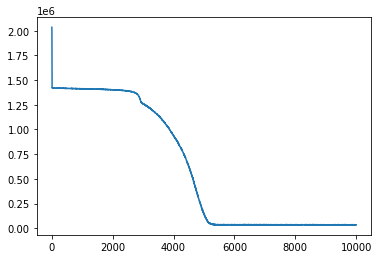

In [501]:
plt.plot(history_df.history['loss'])

In [502]:
pre_vec_df = np.array([[0,0,2020,1]]) # Testing On The First Row -> Result Should be = 28 

In [503]:
pre_vec_df.shape

(1, 4)

In [504]:
model_df.predict(pre_vec_df)

array([[36.86015]], dtype=float32)

### Testing On The Ninth Row -> Result Should be = 46

In [506]:
pre_vec_9_df = np.array([[0,0,2020,8]])

In [507]:
model_df.predict(pre_vec_9_df)

array([[51.981617]], dtype=float32)

In [508]:
pre_vec_0_df = np.array([[2,1,2009,1]])

In [509]:
model_df.predict(pre_vec_0_df) # Actual Result -> 184

array([[271.5558]], dtype=float32)

# Trying Meta Prophet Forecasting Model

In [526]:
!pip install prophet

In [528]:
from prophet import Prophet

In [529]:
m = Prophet()

In [590]:
df_meta = pd.read_csv('210619monatszahlenjuni2021monatszahlen2106verkehrsunfaelle.csv')

In [591]:
df_meta

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2021,202101,NaN,28.0,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2021,202102,NaN,40.0,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2021,202103,NaN,27.0,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2021,202104,NaN,26.0,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2021,202105,NaN,40.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1990,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
1991,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
1992,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
1993,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [592]:
df_meta = df_meta[df_meta.MONAT != 'Summe'] # Drop unnecessary rows

In [593]:
df_meta = df_meta.sort_values(by ='MONAT' , ascending=True) # Sort values by time

In [594]:
# Changing Month Column to numbers between 1-12 and save to df_meta_1

df_meta_1 = df_meta['MONAT'].str.extract('.*(\d{2})', expand = False) 

In [595]:
df_meta_1.head()

1983    01
1698    01
558     01
843     01
273     01
Name: MONAT, dtype: object

In [596]:
# Replacing column 'Month' of df_meta with column of df_meta_1

df_meta = df_meta.assign(MONAT=df_meta_1[:]) 

In [597]:
df_meta.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
1983,Verkehrsunfälle,Verletzte und Getötete,2000,01,434.0,NaN,NaN,NaN,434.0
1698,Verkehrsunfälle,mit Personenschäden,2000,01,321.0,NaN,NaN,NaN,321.0
558,Alkoholunfälle,Verletzte und Getötete,2000,01,37.0,NaN,NaN,NaN,37.0
843,Fluchtunfälle,insgesamt,2000,01,835.0,NaN,NaN,NaN,835.0
273,Alkoholunfälle,insgesamt,2000,01,78.0,NaN,NaN,NaN,78.0


In [598]:
# Changing the non-numeric objects into integers

df_meta["MONAT"] = pd.to_numeric(df_meta["MONAT"])

In [599]:
# Changing the non-string objects into strings to be able to filter the df_meta

df_meta[['MONATSZAHL', 'AUSPRAEGUNG']] = df_meta[['MONATSZAHL', 'AUSPRAEGUNG']].astype(pd.StringDtype()) 

In [600]:
# Creating Column for days as datetime needs days as input

df_meta["Day"] = 11

In [601]:
df_meta.head()

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,Day
1983,Verkehrsunfälle,Verletzte und Getötete,2000,1,434.0,NaN,NaN,NaN,434.0,11
1698,Verkehrsunfälle,mit Personenschäden,2000,1,321.0,NaN,NaN,NaN,321.0,11
558,Alkoholunfälle,Verletzte und Getötete,2000,1,37.0,NaN,NaN,NaN,37.0,11
843,Fluchtunfälle,insgesamt,2000,1,835.0,NaN,NaN,NaN,835.0,11
273,Alkoholunfälle,insgesamt,2000,1,78.0,NaN,NaN,NaN,78.0,11


In [602]:
dict = {'JAHR': 'Year',
        'MONAT': 'Month'}

In [603]:
df_meta.rename(columns=dict,
          inplace=True)

In [604]:
df_meta.head()

,MONATSZAHL,AUSPRAEGUNG,Year,Month,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,Day
1983,Verkehrsunfälle,Verletzte und Getötete,2000,1,434.0,NaN,NaN,NaN,434.0,11
1698,Verkehrsunfälle,mit Personenschäden,2000,1,321.0,NaN,NaN,NaN,321.0,11
558,Alkoholunfälle,Verletzte und Getötete,2000,1,37.0,NaN,NaN,NaN,37.0,11
843,Fluchtunfälle,insgesamt,2000,1,835.0,NaN,NaN,NaN,835.0,11
273,Alkoholunfälle,insgesamt,2000,1,78.0,NaN,NaN,NaN,78.0,11


In [605]:
# Obtaining a datetime column to be able to visualise historically the number of accidents 

df_meta['ds']=pd.to_datetime(df_meta[['Year', 'Month', 'Day']])

In [606]:
df_meta.head()

,MONATSZAHL,AUSPRAEGUNG,Year,Month,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT,Day,ds
1983,Verkehrsunfälle,Verletzte und Getötete,2000,1,434.0,NaN,NaN,NaN,434.0,11,2000-01-11
1698,Verkehrsunfälle,mit Personenschäden,2000,1,321.0,NaN,NaN,NaN,321.0,11,2000-01-11
558,Alkoholunfälle,Verletzte und Getötete,2000,1,37.0,NaN,NaN,NaN,37.0,11,2000-01-11
843,Fluchtunfälle,insgesamt,2000,1,835.0,NaN,NaN,NaN,835.0,11,2000-01-11
273,Alkoholunfälle,insgesamt,2000,1,78.0,NaN,NaN,NaN,78.0,11,2000-01-11


In [607]:
# Dropping unnecessary columns

df_meta.drop(['VORJAHRESWERT','VERAEND_VORMONAT_PROZENT','VERAEND_VORJAHRESMONAT_PROZENT', 'ZWOELF_MONATE_MITTELWERT', 'Day'],axis=1 ,inplace=True)

In [608]:
df_meta.head()

,MONATSZAHL,AUSPRAEGUNG,Year,Month,WERT,ds
1983,Verkehrsunfälle,Verletzte und Getötete,2000,1,434.0,2000-01-11
1698,Verkehrsunfälle,mit Personenschäden,2000,1,321.0,2000-01-11
558,Alkoholunfälle,Verletzte und Getötete,2000,1,37.0,2000-01-11
843,Fluchtunfälle,insgesamt,2000,1,835.0,2000-01-11
273,Alkoholunfälle,insgesamt,2000,1,78.0,2000-01-11


In [610]:
# Renaming the column for later using in the Pipeline

df_meta = df_meta.rename(columns={'WERT': 'y'}) 

In [611]:
df_meta = df_meta.rename(columns={'MONATSZAHL': 'Category'})
df_meta = df_meta.rename(columns={'AUSPRAEGUNG': 'Accident-type'})

In [613]:
df_meta.head()

,Category,Accident-type,Year,Month,y,ds
1983,Verkehrsunfälle,Verletzte und Getötete,2000,1,434.0,2000-01-11
1698,Verkehrsunfälle,mit Personenschäden,2000,1,321.0,2000-01-11
558,Alkoholunfälle,Verletzte und Getötete,2000,1,37.0,2000-01-11
843,Fluchtunfälle,insgesamt,2000,1,835.0,2000-01-11
273,Alkoholunfälle,insgesamt,2000,1,78.0,2000-01-11


In [614]:
# Setting Accident Type as "insgesamt"

df_meta = df_meta.loc[(df_meta['Accident-type'] == 'insgesamt')]

In [615]:
df_meta

,Category,Accident-type,Year,Month,y,ds
843,Fluchtunfälle,insgesamt,2000,1,835.0,2000-01-11
273,Alkoholunfälle,insgesamt,2000,1,78.0,2000-01-11
1413,Verkehrsunfälle,insgesamt,2000,1,3448.0,2000-01-11
844,Fluchtunfälle,insgesamt,2000,2,890.0,2000-02-11
1414,Verkehrsunfälle,insgesamt,2000,2,3181.0,2000-02-11
...,...,...,...,...,...,...
1150,Verkehrsunfälle,insgesamt,2021,11,NaN,2021-11-11
10,Alkoholunfälle,insgesamt,2021,11,NaN,2021-11-11
581,Fluchtunfälle,insgesamt,2021,12,NaN,2021-12-11
11,Alkoholunfälle,insgesamt,2021,12,NaN,2021-12-11


In [616]:
# Creating df for 'Alkoholunfälle' which means "alcohol accidents"

df_alk = df_meta.loc[(df_meta['Category'] == 'Alkoholunfälle')]

# Creating df for 'Fluchtunfälle' which means "escape accidents"

df_flucht = df_meta.loc[(df_meta['Category'] == 'Fluchtunfälle')]

# Creating df for 'Verkehrsunfälle' which means "traffic accidents"

df_verkehr = df_meta.loc[(df_meta['Category'] == 'Verkehrsunfälle')]

In [617]:
df_alk

,Category,Accident-type,Year,Month,y,ds
273,Alkoholunfälle,insgesamt,2000,1,78.0,2000-01-11
274,Alkoholunfälle,insgesamt,2000,2,53.0,2000-02-11
275,Alkoholunfälle,insgesamt,2000,3,73.0,2000-03-11
276,Alkoholunfälle,insgesamt,2000,4,78.0,2000-04-11
277,Alkoholunfälle,insgesamt,2000,5,96.0,2000-05-11
...,...,...,...,...,...,...
7,Alkoholunfälle,insgesamt,2021,8,NaN,2021-08-11
8,Alkoholunfälle,insgesamt,2021,9,NaN,2021-09-11
9,Alkoholunfälle,insgesamt,2021,10,NaN,2021-10-11
10,Alkoholunfälle,insgesamt,2021,11,NaN,2021-11-11


In [618]:
df_flucht

,Category,Accident-type,Year,Month,y,ds
843,Fluchtunfälle,insgesamt,2000,1,835.0,2000-01-11
844,Fluchtunfälle,insgesamt,2000,2,890.0,2000-02-11
845,Fluchtunfälle,insgesamt,2000,3,974.0,2000-03-11
846,Fluchtunfälle,insgesamt,2000,4,834.0,2000-04-11
847,Fluchtunfälle,insgesamt,2000,5,1086.0,2000-05-11
...,...,...,...,...,...,...
577,Fluchtunfälle,insgesamt,2021,8,NaN,2021-08-11
578,Fluchtunfälle,insgesamt,2021,9,NaN,2021-09-11
579,Fluchtunfälle,insgesamt,2021,10,NaN,2021-10-11
580,Fluchtunfälle,insgesamt,2021,11,NaN,2021-11-11


In [619]:
df_verkehr

,Category,Accident-type,Year,Month,y,ds
1413,Verkehrsunfälle,insgesamt,2000,1,3448.0,2000-01-11
1414,Verkehrsunfälle,insgesamt,2000,2,3181.0,2000-02-11
1415,Verkehrsunfälle,insgesamt,2000,3,3783.0,2000-03-11
1416,Verkehrsunfälle,insgesamt,2000,4,3317.0,2000-04-11
1417,Verkehrsunfälle,insgesamt,2000,5,4123.0,2000-05-11
...,...,...,...,...,...,...
1147,Verkehrsunfälle,insgesamt,2021,8,NaN,2021-08-11
1148,Verkehrsunfälle,insgesamt,2021,9,NaN,2021-09-11
1149,Verkehrsunfälle,insgesamt,2021,10,NaN,2021-10-11
1150,Verkehrsunfälle,insgesamt,2021,11,NaN,2021-11-11


In [626]:
import pickle

In [621]:
from prophet import Prophet
m = Prophet()
m.fit(df_alk) # alcohol accidents

# Fitting monthly data and making monthly forecasts for the next 12 months
future = m.make_future_dataframe(periods=12, freq='30d')
forecast = m.predict(future)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [630]:
future

,ds
0,2000-01-11
1,2000-02-11
2,2000-03-11
3,2000-04-11
4,2000-05-11
...,...
271,2022-08-08
272,2022-09-07
273,2022-10-07
274,2022-11-06


In [622]:
print(forecast)

            ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2000-01-11  75.980337   54.914961   74.752782    75.980337    75.980337   
1   2000-02-11  75.623935   52.373741   71.805396    75.623935    75.623935   
2   2000-03-11  75.290527   57.293138   77.234890    75.290527    75.290527   
3   2000-04-11  74.934124   59.310364   79.784431    74.934124    74.934124   
4   2000-05-11  74.589219   71.856497   91.199278    74.589219    74.589219   
..         ...        ...         ...         ...          ...          ...   
271 2022-08-08  33.298905   25.170768   44.946397    32.973400    33.668466   
272 2022-09-07  33.306081   33.678353   53.034027    32.949211    33.711737   
273 2022-10-07  33.313258   32.423504   52.795672    32.920207    33.763264   
274 2022-11-06  33.320435   25.250191   44.741971    32.900883    33.798483   
275 2022-12-06  33.327611   20.773393   40.360165    32.879826    33.840401   

     additive_terms  additive_terms_lower  additive

In [631]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-11,75.980337,54.914961,74.752782,75.980337,75.980337,-10.945459,-10.945459,-10.945459,-10.945459,-10.945459,-10.945459,0.0,0.0,0.0,65.034878
1,2000-02-11,75.623935,52.373741,71.805396,75.623935,75.623935,-13.214472,-13.214472,-13.214472,-13.214472,-13.214472,-13.214472,0.0,0.0,0.0,62.409463
2,2000-03-11,75.290527,57.293138,77.234890,75.290527,75.290527,-8.062207,-8.062207,-8.062207,-8.062207,-8.062207,-8.062207,0.0,0.0,0.0,67.228320
3,2000-04-11,74.934124,59.310364,79.784431,74.934124,74.934124,-5.059545,-5.059545,-5.059545,-5.059545,-5.059545,-5.059545,0.0,0.0,0.0,69.874580
4,2000-05-11,74.589219,71.856497,91.199278,74.589219,74.589219,6.800354,6.800354,6.800354,6.800354,6.800354,6.800354,0.0,0.0,0.0,81.389573
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,2022-08-08,33.298905,25.170768,44.946397,32.973400,33.668466,1.398397,1.398397,1.398397,1.398397,1.398397,1.398397,0.0,0.0,0.0,34.697302
272,2022-09-07,33.306081,33.678353,53.034027,32.949211,33.711737,10.396904,10.396904,10.396904,10.396904,10.396904,10.396904,0.0,0.0,0.0,43.702985
273,2022-10-07,33.313258,32.423504,52.795672,32.920207,33.763264,8.839245,8.839245,8.839245,8.839245,8.839245,8.839245,0.0,0.0,0.0,42.152503
274,2022-11-06,33.320435,25.250191,44.741971,32.900883,33.798483,1.759586,1.759586,1.759586,1.759586,1.759586,1.759586,0.0,0.0,0.0,35.080021


In [628]:
# saving as bin file
with open('forecast_model.bin', 'wb') as fout:
    pickle.dump(m, fout)

In [707]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
252,2021-01-11,22.049745,12.533172,31.385706
253,2021-02-11,21.631378,12.014639,31.391553
254,2021-03-11,25.088958,15.045405,34.676980
255,2021-04-11,28.775406,19.328986,37.939505
256,2021-05-11,39.360875,29.205378,48.880114
257,2021-06-11,36.902171,27.092398,47.464005
258,2021-07-11,46.734198,37.151726,56.489784
259,2021-08-11,36.599872,26.432000,46.154727
260,2021-09-11,47.777714,38.701921,57.547404
261,2021-10-11,36.864067,26.876547,46.669120


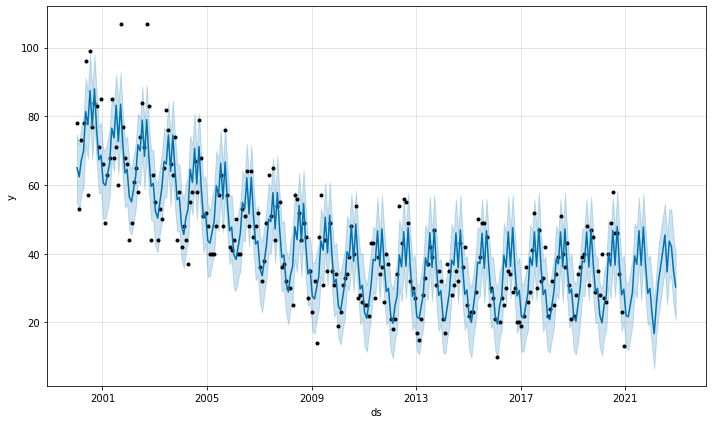

In [635]:
fig1 = m.plot(forecast)

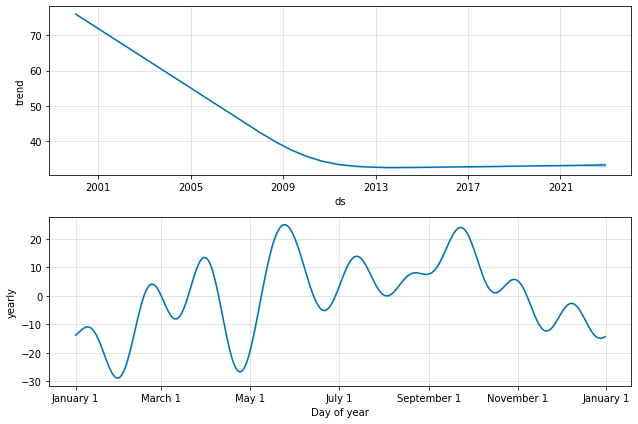

In [636]:
fig2 = m.plot_components(forecast)

### Making predictions for Escape Accidents

In [644]:
m_2 = Prophet()
m_2.fit(df_flucht) # escape accidents

# Fitting monthly data and making monthly forecasts for the next 12 months
future_2 = m_2.make_future_dataframe(periods=12, freq='30d')
forecast_2 = m_2.predict(future_2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [645]:
# saving as bin file
with open('forecast_model_escape.bin', 'wb') as fout:
    pickle.dump(m_2, fout)

In [708]:
forecast_2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
252,2021-01-11,829.010822,710.433845,959.258283
253,2021-02-11,860.468213,739.797544,994.807061
254,2021-03-11,963.632042,841.166613,1094.975685
255,2021-04-11,951.937855,828.243285,1069.260878
256,2021-05-11,974.743390,848.717660,1097.393870
257,2021-06-11,966.981287,846.887413,1086.730910
258,2021-07-11,1079.778013,954.588850,1206.857629
259,2021-08-11,883.057611,756.617690,1010.969039
260,2021-09-11,1018.820996,893.846590,1150.283102
261,2021-10-11,1074.614247,942.611543,1199.617628


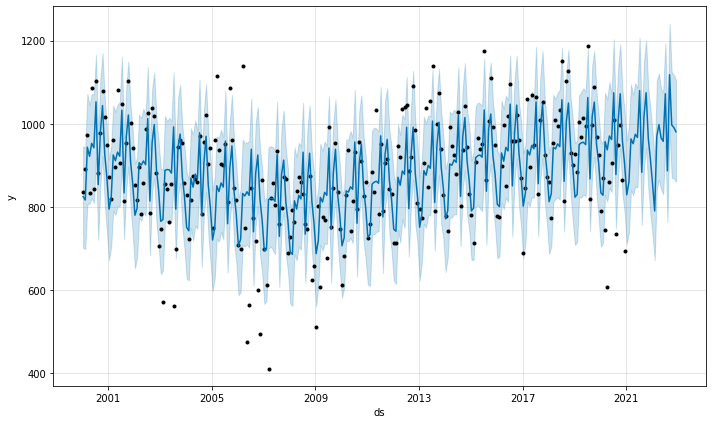

In [648]:
fig2 = m_2.plot(forecast_2)

### Making predictions for Traffic Accidents

In [646]:
m_3 = Prophet()
m_3.fit(df_verkehr) # traffic accidents

# Fitting monthly data and making monthly forecasts for the next 12 months
future_3 = m_3.make_future_dataframe(periods=12, freq='30d')
forecast_3 = m_3.predict(future_3)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [647]:
# saving as bin file
with open('forecast_model_traffic.bin', 'wb') as fout:
    pickle.dump(m_3, fout)

In [709]:
forecast_3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

,ds,yhat,yhat_lower,yhat_upper
252,2021-01-11,3009.985637,2706.133389,3346.262547
253,2021-02-11,3157.894770,2834.297539,3489.839476
254,2021-03-11,3458.230028,3123.996133,3804.152569
255,2021-04-11,3350.264757,3043.780390,3699.149672
256,2021-05-11,3621.234255,3285.275333,3932.254698
257,2021-06-11,3490.992621,3157.427935,3805.200901
258,2021-07-11,3981.500213,3649.862576,4304.582137
259,2021-08-11,3041.679117,2704.381090,3363.192935
260,2021-09-11,3659.276194,3336.718703,3966.273100
261,2021-10-11,3848.736674,3528.689612,4168.856587


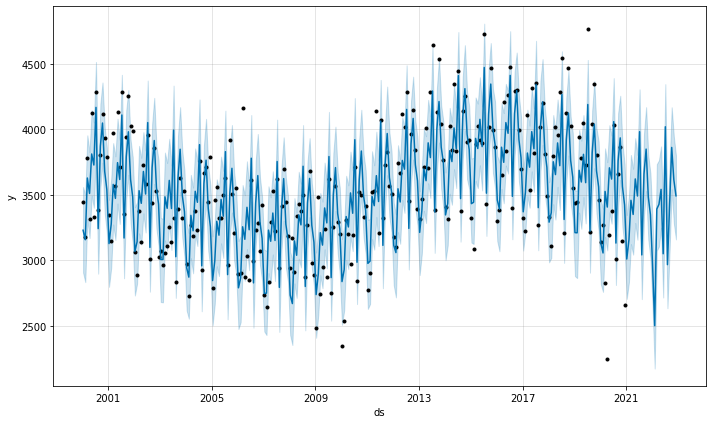

In [649]:
fig3 = m_3.plot(forecast_3)

# Further Visualization

In [710]:
data_df_visual = pd.read_csv("210619monatszahlenjuni2021monatszahlen2106verkehrsunfaelle.csv")

In [711]:
#Selecting only important columns
features = ['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT']

#Make the data only the important columns
data_df_visual = data_df_visual[features]

# Rename the columns we will be working on 
data_df_visual = data_df_visual.rename( columns = { 
    'MONATSZAHL' : 'Category',
    'AUSPRAEGUNG': 'Accident_Type',
    'JAHR'       : 'Year',
    'MONAT'      : 'Month',
    'WERT'       : 'Value'
})

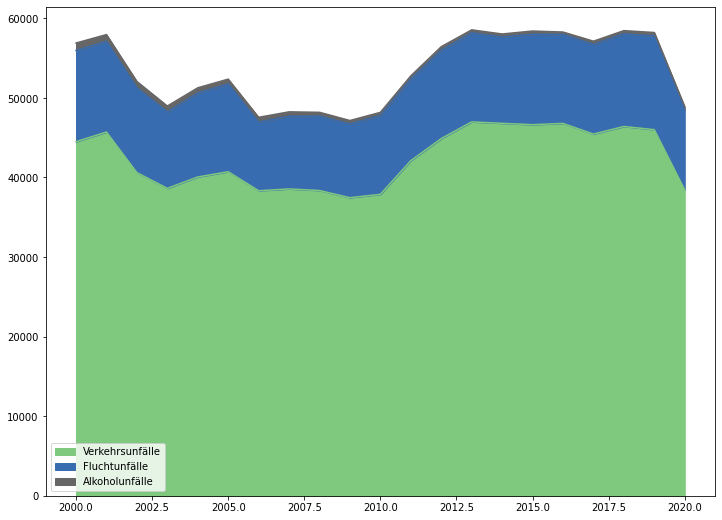

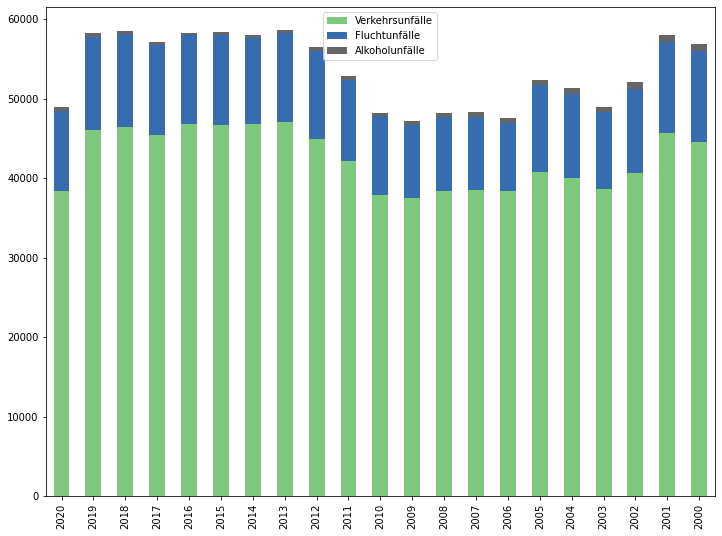

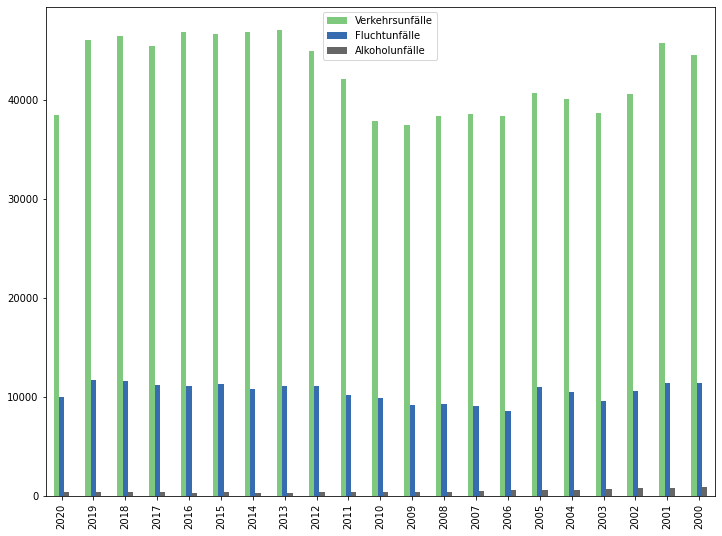

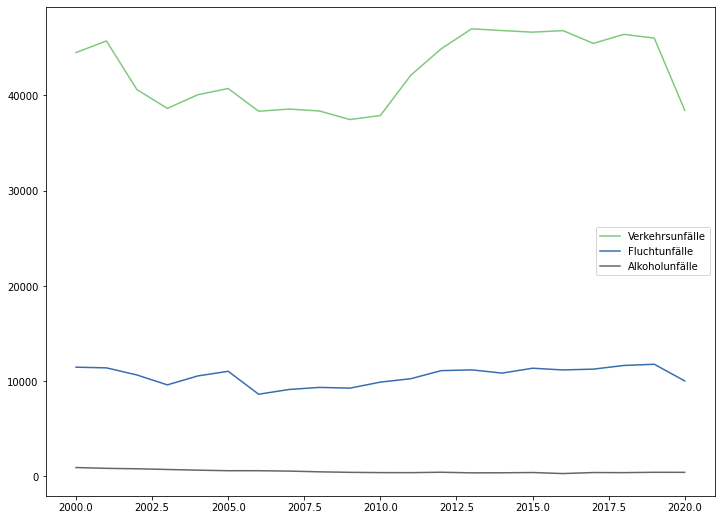

In [713]:
# Data Visualization

accidents = data_df_visual[data_df_visual['Year'] < 2021]

Verkehrsunfälle = accidents[(
    (accidents['Category'] == 'Verkehrsunfälle') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_Type'] == 'insgesamt')
    )]
Fluchtunfälle = accidents[(
    (accidents['Category'] == 'Fluchtunfälle') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_Type'] == 'insgesamt')
    )]
Alkoholunfälle = accidents[(
    (accidents['Category'] == 'Alkoholunfälle') &
    (accidents['Month'] == 'Summe') &
    (accidents['Accident_Type'] == 'insgesamt')
    )]

years = [i for i in range(2000, 2021)]
years.sort(reverse=True)

accidents_category = pd.DataFrame({
        "Verkehrsunfälle": Verkehrsunfälle['Value'].to_numpy(),
        "Fluchtunfälle": Fluchtunfälle['Value'].to_numpy(),
        "Alkoholunfälle": Alkoholunfälle['Value'].to_numpy()
    },
    index= years
)

accidents_category.plot(kind='area',colormap='Accent',)
plt.gcf().set_size_inches(12,9)
accidents_category.plot(kind='bar', colormap='Accent', stacked= True)
plt.gcf().set_size_inches(12,9)
accidents_category.plot(kind='bar', colormap='Accent')
plt.gcf().set_size_inches(12,9)
accidents_category.plot(colormap='Accent')
plt.gcf().set_size_inches(12,9)

In [714]:
# Removing null values
data_df_visual = data_df_visual.dropna()

# Remove the 'Summe' from Month column 
data_df_visual = data_df_visual[data_df_visual['Month'] != 'Summe']

In [717]:
!pip install seaborn

     |████████████████████████████████| 292 kB 3.4 MB/s eta 0:00:01


In [718]:
import seaborn as sns

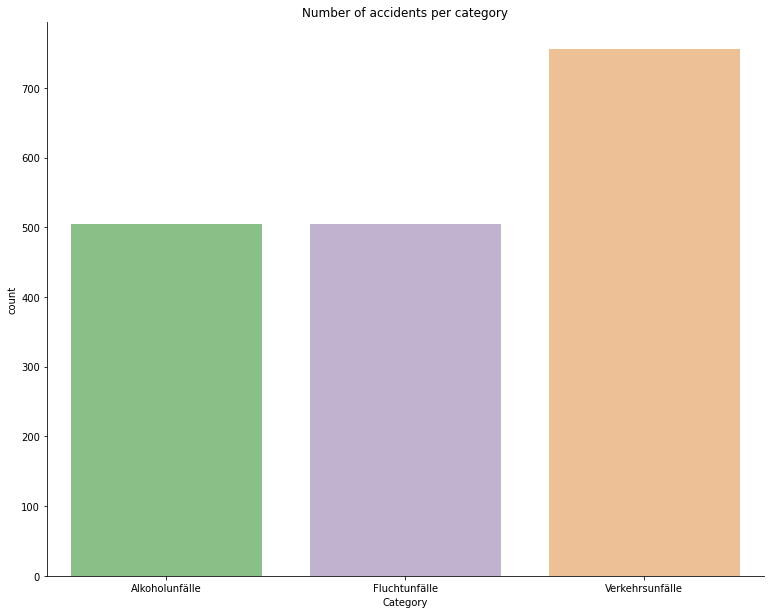

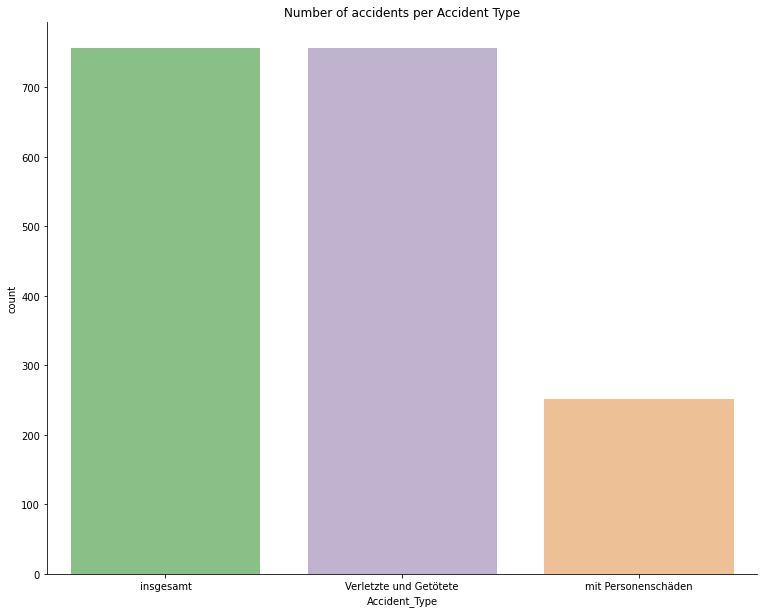

In [720]:
# Plotting Number of accidents per category
plot = sns.catplot(x="Category", kind="count", data=data_df_visual, palette="Accent")
plt.title('Number of accidents per category')
plt.gcf().set_size_inches(12,9)

# Plotting Number of accidents per Accident Type
plot = sns.catplot(x="Accident_Type", kind="count", data=data_df_visual, palette="Accent")
plt.title('Number of accidents per Accident Type')
plt.gcf().set_size_inches(12,9)

# Implementation of All 8 Input Fields from the Dataset.

In [220]:
data_df_5 = pd.read_csv("dataset-after-final-cleaning.csv")

In [221]:
data_df_5

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,0,0,2020,1,28,22,-20.00,27.27,37
1,0,0,2020,2,40,28,42.86,42.86,38
2,0,0,2020,3,27,34,-32.50,-20.59,37
3,0,0,2020,4,26,36,-3.70,-27.78,36
4,0,0,2020,5,40,39,53.85,2.56,36
...,...,...,...,...,...,...,...,...,...
1673,2,2,2001,8,600,647,-34.85,-7.26,617
1674,2,2,2001,9,643,675,7.17,-4.74,614
1675,2,2,2001,10,717,615,11.51,16.59,623
1676,2,2,2001,11,568,578,-20.78,-1.73,622


In [222]:
# Final Pipeline
X = data_df_5[['MONATSZAHL','AUSPRAEGUNG','JAHR','MONAT','VORJAHRESWERT','VERAEND_VORMONAT_PROZENT','VERAEND_VORJAHRESMONAT_PROZENT','ZWOELF_MONATE_MITTELWERT']].values
y = data_df_5[['WERT']].values

In [223]:
X

array([[ 0.000e+00,  0.000e+00,  2.020e+03, ..., -2.000e+01,  2.727e+01,
         3.700e+01],
       [ 0.000e+00,  0.000e+00,  2.020e+03, ...,  4.286e+01,  4.286e+01,
         3.800e+01],
       [ 0.000e+00,  0.000e+00,  2.020e+03, ..., -3.250e+01, -2.059e+01,
         3.700e+01],
       ...,
       [ 2.000e+00,  2.000e+00,  2.001e+03, ...,  1.151e+01,  1.659e+01,
         6.230e+02],
       [ 2.000e+00,  2.000e+00,  2.001e+03, ..., -2.078e+01, -1.730e+00,
         6.220e+02],
       [ 2.000e+00,  2.000e+00,  2.001e+03, ..., -1.074e+01, -1.550e+00,
         6.210e+02]])

In [224]:
y

array([[ 28],
       [ 40],
       [ 27],
       ...,
       [717],
       [568],
       [507]])

In [225]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=0)

In [226]:
print(len(X_train))
print(len(y_train))
print(len(X_valid))
print(len(X_valid))

1510
1510
168
168


In [227]:
input_dim = X_train.shape[1]
print(input_dim)

8


## Trying Bernoulli Naive Bayes

In [230]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

/Users/prateeksawhney97/opt/anaconda3/envs/accidentdps/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BernoulliNB()

In [232]:
my_prediction_bnb = bnb.predict([[0,0,2020,1,22,-20,27.27,37]]) # Testing On The First Row -> Result Should be = 28 

In [233]:
print(my_prediction_bnb)

[40]


## Trying Linear Regression

In [235]:
from sklearn.linear_model import LinearRegression

In [236]:
regressor = LinearRegression()

In [237]:
regressor.fit(X_train, y_train)

LinearRegression()

In [238]:
regressor.predict([[0,0,2020,1,22,-20,27.27,37]]) # Testing On The First Row -> Result Should be = 28 

array([[14.97017615]])

## Trying Own Model

In [335]:
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=input_dim))
model.add(Dense(16, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2048, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

In [338]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr=1.0e-5))

In [339]:
history = model.fit(X_train, y_train, nb_epoch=100, verbose=1, validation_data=(X_valid, y_valid))

Train on 1510 samples, validate on 168 samples
Epoch 1/100
1510/1510 [==============================] - 4s - loss: 12456.4368 - val_loss: 11889.1146
Epoch 2/100
1510/1510 [==============================] - 1s - loss: 11397.7441 - val_loss: 11064.7536
Epoch 3/100
1510/1510 [==============================] - 1s - loss: 11697.9278 - val_loss: 11671.7329
Epoch 4/100
1510/1510 [==============================] - 1s - loss: 11323.3908 - val_loss: 10738.7176
Epoch 5/100
1510/1510 [==============================] - 1s - loss: 11126.7581 - val_loss: 10107.8318
Epoch 6/100
1510/1510 [==============================] - 1s - loss: 11232.2669 - val_loss: 10069.5000
Epoch 7/100
1510/1510 [==============================] - 1s - loss: 11189.6328 - val_loss: 10186.7730
Epoch 8/100
1510/1510 [==============================] - 1s - loss: 11065.4176 - val_loss: 10018.7640
Epoch 9/100
1510/1510 [==============================] - 1s - loss: 11352.2798 - val_loss: 10056.7572
Epoch 10/100
1510/1510 [===========

1510/1510 [==============================] - 1s - loss: 9108.2027 - val_loss: 8814.6566
Epoch 81/100
1510/1510 [==============================] - 1s - loss: 8951.2210 - val_loss: 9275.8880
Epoch 82/100
1510/1510 [==============================] - 1s - loss: 9248.9019 - val_loss: 8238.0993
Epoch 83/100
1510/1510 [==============================] - 1s - loss: 9234.3412 - val_loss: 8327.7336
Epoch 84/100
1510/1510 [==============================] - 1s - loss: 8832.0777 - val_loss: 8509.2411
Epoch 85/100
1510/1510 [==============================] - 1s - loss: 8829.5873 - val_loss: 9332.0862
Epoch 86/100
1510/1510 [==============================] - 1s - loss: 8756.5322 - val_loss: 8115.5435
Epoch 87/100
1510/1510 [==============================] - 1s - loss: 8853.7179 - val_loss: 8027.0109
Epoch 88/100
1510/1510 [==============================] - 1s - loss: 8859.8391 - val_loss: 8159.6925
Epoch 89/100
1510/1510 [==============================] - 1s - loss: 8575.4542 - val_loss: 8412.9559
Epo

In [340]:
print(history)

In [341]:
model.save("AccidentPrediction.h5")

In [342]:
model.evaluate(X_valid, y_valid)

160/168 [===========================>..] - ETA: 0s

7170.815139770508

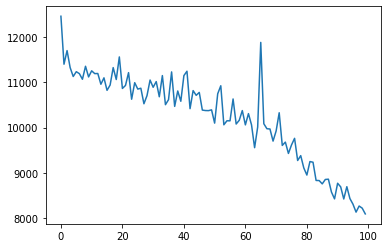

In [343]:
plt.plot(history.history['loss'])

### Testing On The First Row -> Result Should be = 28 

In [344]:
pre_vec = np.array([[0,0,2020,1,22,-20,27.27,37]])

In [345]:
pre_vec.shape

(1, 8)

In [346]:
model.predict(pre_vec)

array([[28.498457]], dtype=float32)

### Testing On The Ninth Row -> Result Should be = 46

In [349]:
pre_vec_9 = np.array([[0,0,2020,8,31,-20.69,48.39,39]])

In [350]:
model.predict(pre_vec_9)

array([[46.91959]], dtype=float32)

In [352]:
pre_vec_0 = np.array([[2,1,2009,1,260,-20,-29.23,330]])

In [360]:
model.predict(pre_vec_0) # Actual Result -> 184

array([[180.62553]], dtype=float32)